In [2]:
#Importing Relevant Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading the dataset

In [5]:
data = pd.read_csv("booking.csv")

In [6]:
#Understanding the data

In [7]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [9]:
data.shape

(36285, 17)

In [10]:
#Insight: No missing values noted. No extra columns noted i.e same number of columns as specified in the data dictionary

In [11]:
data.duplicated().sum()

np.int64(0)

In [12]:
#Insight: No duplicate data detected

In [13]:
data.describe(include='all')

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
count,36285,36285.000000,36285.000000,36285.000000,36285.000000,36285,36285.000000,36285,36285.000000,36285,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285,36285
unique,36285,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,NaN,NaN,NaN,NaN,NaN,553,2
top,INN36286,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,Online,NaN,NaN,NaN,NaN,NaN,10/13/2018,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,27842,NaN,28138,NaN,23221,NaN,NaN,NaN,NaN,NaN,254,24396
mean,NaN,1.844839,0.105360,0.810693,2.204602,NaN,0.030977,NaN,85.239851,NaN,0.025630,0.023343,0.153369,103.421636,0.619733,NaN,NaN
std,NaN,0.518813,0.402704,0.870590,1.410946,NaN,0.173258,NaN,85.938796,NaN,0.158032,0.368281,1.753931,35.086469,0.786262,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,NaN,NaN


In [14]:
numerical_columns = data.select_dtypes(include='number')

In [15]:
len(numerical_columns.columns)

11

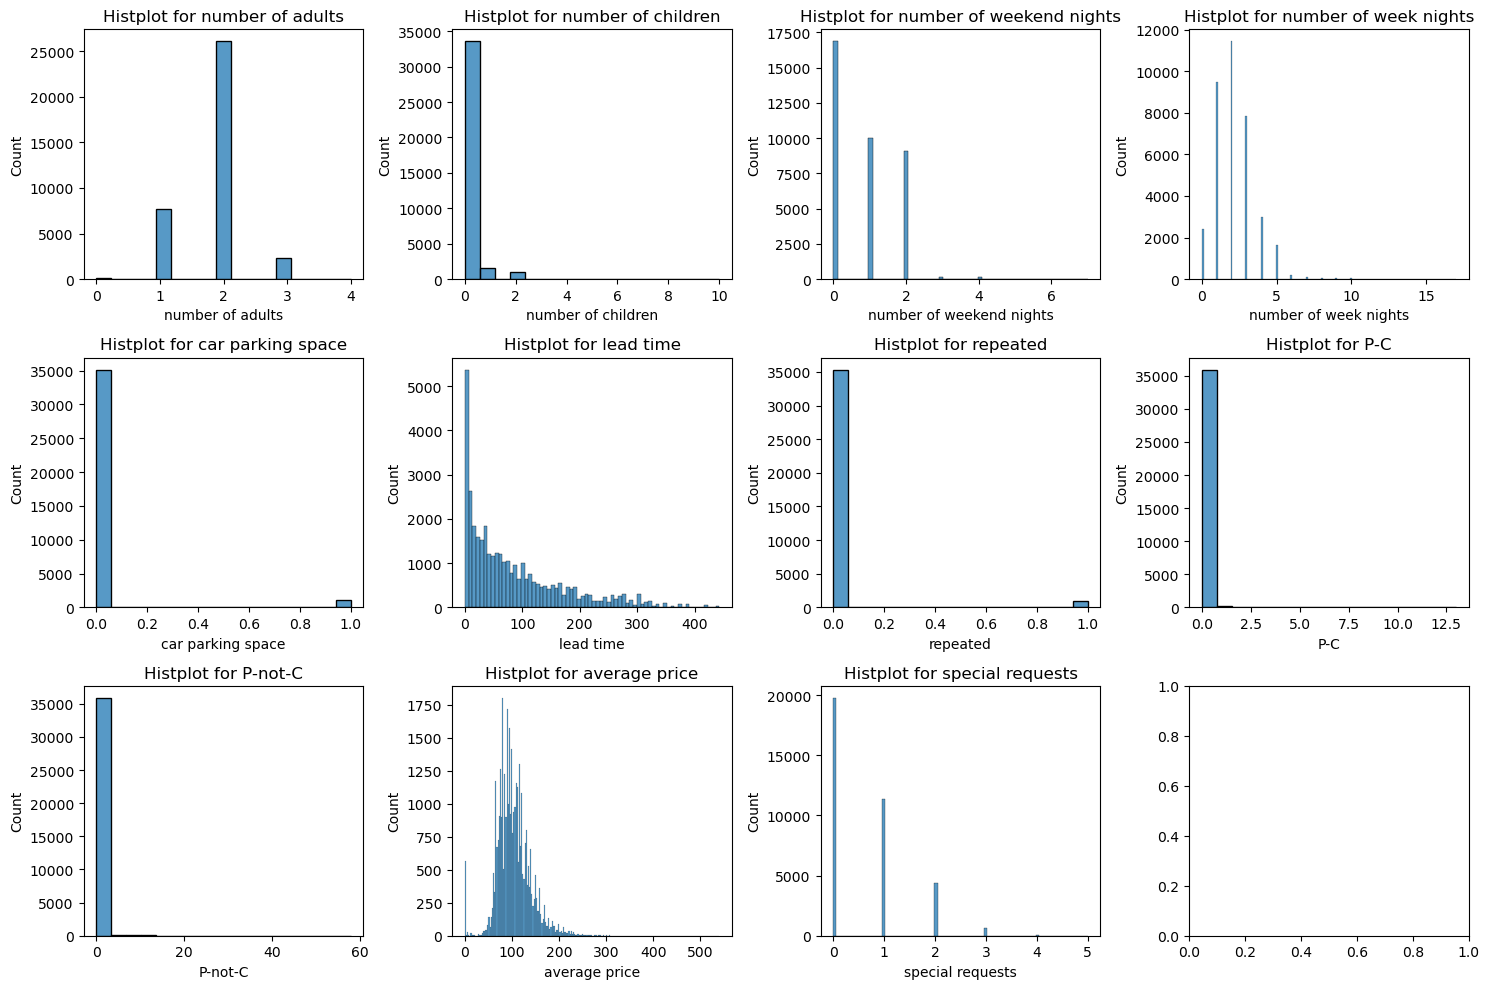

In [16]:
fig,ax = plt.subplots(nrows=3, ncols=4, figsize=(15,10))
ax = ax.flatten()
for idx, col in enumerate(numerical_columns):
    sns.histplot(data[col], ax=ax[idx])
    ax[idx].set_title(f"Histplot for {col}")
plt.tight_layout()
plt.show()

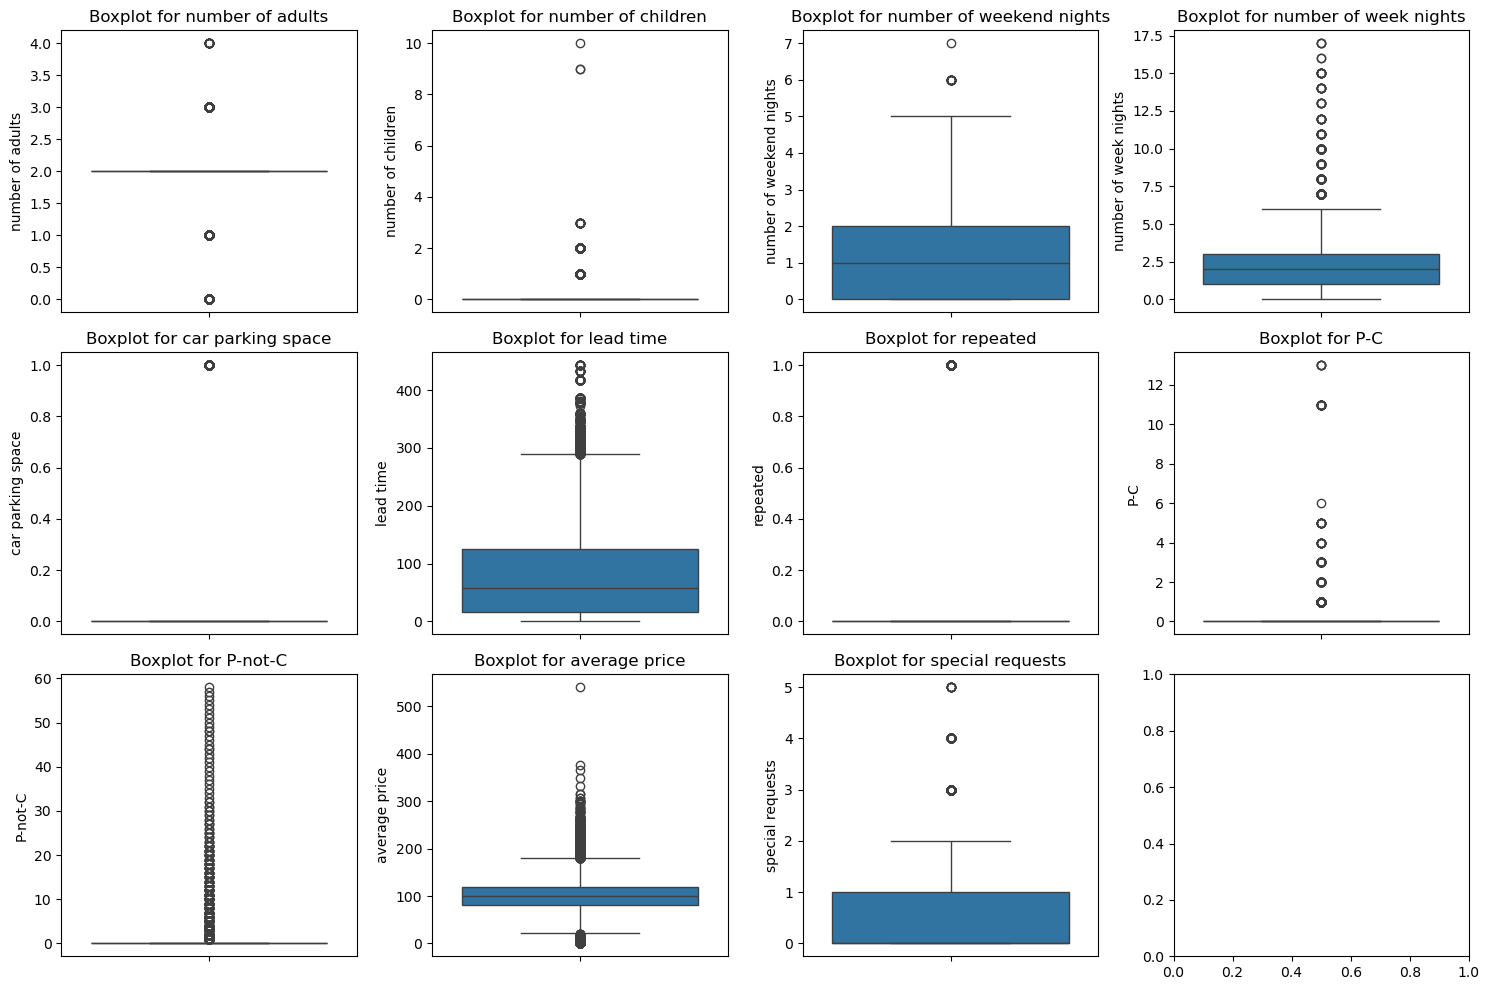

In [17]:
fig,ax = plt.subplots(nrows=3, ncols=4, figsize=(15,10))
ax = ax.flatten()
for idx, col in enumerate(numerical_columns):
    sns.boxplot(data[col], ax=ax[idx])
    ax[idx].set_title(f"Boxplot for {col}")
plt.tight_layout()
plt.show()

In [18]:
#Insight: Outliers observed in all columns. Plan: Investigate each column individually

In [19]:
#Column by Column check for messy/inconsistent data and further data understanding

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [21]:
data["Booking_ID"]

0        INN00001
1        INN00002
2        INN00003
3        INN00004
4        INN00005
           ...   
36280    INN36282
36281    INN36283
36282    INN36284
36283    INN36285
36284    INN36286
Name: Booking_ID, Length: 36285, dtype: object

In [22]:
#Insight: 1st Column (Index 0) looks good. No action needed here for now. Would eventually be removed before model training

In [23]:
data["number of adults"].value_counts()

number of adults
2    26110
1     7702
3     2318
0      139
4       16
Name: count, dtype: int64

In [24]:
q1=data["number of adults"].quantile(0.25)
q3=data["number of adults"].quantile(0.75)
print(q1,q3)

2.0 2.0


In [25]:
#Insight: 2nd Column (Index 1) looks good. No action needed here for now. 
#I'm not convinced that the outliers here need to be removed as they are factual values and the lower and upper bound values are equal
#Would train the model with and without the outliers handled and see if any significant differences exist

In [26]:
data[(data['number of adults'] == 0)] #to check the rows that had no adults in the booking

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
32,INN00033,0,2,0,3,Meal Plan 1,0,Room_Type 2,56,Online,0,0,0,82.44,1,12/7/2018,Not_Canceled
287,INN00288,0,2,2,2,Meal Plan 1,0,Room_Type 1,68,Online,0,0,0,108.38,1,4/24/2018,Canceled
653,INN00654,0,2,1,2,Meal Plan 1,0,Room_Type 2,78,Online,0,0,0,115.68,1,8/19/2018,Not_Canceled
937,INN00938,0,2,0,3,Meal Plan 1,0,Room_Type 2,40,Online,0,0,0,6.67,1,1/14/2018,Not_Canceled
954,INN00955,0,2,1,1,Meal Plan 1,0,Room_Type 2,92,Online,0,0,0,81.50,2,10/29/2018,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34720,INN34721,0,2,0,3,Meal Plan 1,0,Room_Type 2,76,Online,0,0,0,127.38,3,9/21/2018,Not_Canceled
34730,INN34731,0,2,1,1,Meal Plan 1,0,Room_Type 2,178,Online,0,0,0,88.77,0,8/27/2018,Canceled
34890,INN34891,0,2,2,2,Meal Plan 1,0,Room_Type 2,31,Online,0,0,0,124.25,2,9/16/2018,Not_Canceled
35691,INN35692,0,2,2,1,Meal Plan 1,0,Room_Type 2,75,Online,0,0,0,78.00,0,3/19/2018,Canceled


In [27]:
data[(data['number of adults'] == 0) & (data['number of children'] == 0)]

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status


In [28]:
# 139 bookings had no adults present, however, no booking had neither adults nor children. 
# This simply means that the hotel accepted children bookings only in some cases

In [29]:
data["number of children"].value_counts()

number of children
0     33583
1      1622
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

In [30]:
q1=data["number of children"].quantile(0.25)
q3=data["number of children"].quantile(0.75)
print(q1,q3)

0.0 0.0


In [31]:
#Insight: 3rd Column (Index 2) looks good. No action needed here for now. 
#I'm not convinced that the outliers here need to be removed as they are factual values and the lower and upper bound values are equal
#Would train the model with and without the outliers handled and see if any significant differences exist

In [32]:
data["number of weekend nights"].value_counts()

number of weekend nights
0    16876
1    10000
2     9072
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64

In [33]:
q1=data["number of weekend nights"].quantile(0.25)
q3=data["number of weekend nights"].quantile(0.75)
iqr=q3-q1
lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)
print(q1,q3,iqr,lower_bound,upper_bound)

0.0 2.0 2.0 -3.0 5.0


In [34]:
#Insight: 4th Column (Index 3) looks good. No action needed here for now. 
#I'm not convinced that the outliers here need to be removed as they are factual values and not too far away from the upper bound
#Would train the model with and without the outliers handled and see if any significant differences exist

In [35]:
data["number of week nights"].value_counts()

number of week nights
2     11447
1      9488
3      7842
4      2992
0      2387
5      1616
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64

In [36]:
q1=data["number of week nights"].quantile(0.25)
q3=data["number of week nights"].quantile(0.75)
iqr=q3-q1
lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)
print(q1,q3,iqr,lower_bound,upper_bound)

1.0 3.0 2.0 -2.0 6.0


In [37]:
#Insight: 5th Column (Index 4) looks good. No action needed here for now. 
#However, I believe these outliers need to be clipped before model training, as a couple of them seem significantly deviated from the upper bound.
#Would train the model with and without the outliers handled and see if any significant differences exist

In [38]:
data[(data['number of weekend nights'] == 0) & (data['number of week nights'] == 0)]

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
209,INN00210,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,Complementary,0,0,0,0.0,1,2/27/2018,Not_Canceled
1158,INN01159,2,0,0,0,Meal Plan 1,0,Room_Type 1,145,Online,0,0,0,0.0,1,7/5/2018,Not_Canceled
1403,INN01404,3,0,0,0,Meal Plan 1,0,Room_Type 4,57,Online,0,0,0,0.0,2,4/1/2018,Not_Canceled
1907,INN01908,2,0,0,0,Meal Plan 2,0,Room_Type 1,247,Online,0,0,0,0.0,1,6/6/2018,Not_Canceled
1986,INN01987,2,0,0,0,Meal Plan 1,0,Room_Type 1,43,Online,0,0,0,0.0,1,10/17/2017,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33218,INN33219,1,0,0,0,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,0.0,0,2/6/2018,Not_Canceled
33537,INN33538,2,0,0,0,Meal Plan 1,0,Room_Type 2,166,Online,0,0,0,0.0,2,4/21/2018,Not_Canceled
34750,INN34751,1,0,0,0,Meal Plan 1,0,Room_Type 4,1,Complementary,0,0,0,0.0,0,10/22/2017,Not_Canceled
35472,INN35473,1,0,0,0,Meal Plan 1,0,Room_Type 1,7,Online,0,0,0,0.0,0,2/15/2018,Not_Canceled


In [39]:
# Also, it is worth noting that 78 bookings had 0 weekend nights and 0 weekday nights which therefore makes those bookings invalid. 
# These need to be dropped.

In [40]:
data["type of meal"].value_counts()

type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64

In [41]:
#Insight: 6th Column (Index 5) - Meal plan 3 has so few rows that it might be more advantageous to recategorize it in an 'Other' bucket
# Would train the model with and without this recategorization and see if any significant difference exists.

In [42]:
data["car parking space"].value_counts()

car parking space
0    35161
1     1124
Name: count, dtype: int64

In [43]:
#Insight: 7th Column (Index 6) looks good. No action needed here for now.

In [44]:
data["room type"].value_counts()

room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [45]:
#Insight: 8th Column (Index 7) looks good. No action needed here for now.

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [47]:
data["lead time"].value_counts()

lead time
0      1297
1      1079
2       643
3       630
4       628
       ... 
348       1
352       1
328       1
300       1
355       1
Name: count, Length: 352, dtype: int64

In [48]:
q1=data["lead time"].quantile(0.25)
q3=data["lead time"].quantile(0.75)
iqr=q3-q1
lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)
print(q1,q3,iqr,lower_bound,upper_bound)

17.0 126.0 109.0 -146.5 289.5


In [49]:
#Insight: 9th Column (Index 8) looks good. No action needed here for now. 
#Outliers present and may need to be clipped
#Would train the model with and without the outliers handled and see if any significant differences exist

In [50]:
data["market segment type"].value_counts()

market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [51]:
#Insight: 10th Column (Index 9) looks good. No action needed here for now.

In [52]:
data["repeated"].value_counts()

repeated
0    35355
1      930
Name: count, dtype: int64

In [53]:
#Insight: 11th Column (Index 10) looks good. No action needed here for now.

In [54]:
data["P-C"].value_counts()

P-C
0     35947
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: count, dtype: int64

In [55]:
#Insight: 12th column (Index 11) has several spurious values. According to the data dictionary, it should be binary output i.e 0 or 1,
# however, some outputs show greater than 1 and should therefore be discarded.

In [56]:
data["P-not-C"].value_counts()

P-not-C
0     35473
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
9        19
10       19
11       15
12       12
14        9
15        8
16        7
13        7
17        6
19        6
20        6
18        6
21        6
22        6
25        3
24        3
23        3
27        3
30        2
32        2
44        2
29        2
48        2
28        2
31        2
26        2
53        1
47        1
49        1
34        1
50        1
39        1
33        1
52        1
35        1
37        1
42        1
51        1
38        1
56        1
45        1
55        1
57        1
46        1
43        1
54        1
58        1
41        1
40        1
36        1
Name: count, dtype: int64

In [57]:
#Insight: 13th column (Index 12) has several spurious values. According to the data dictionary, it should be binary output i.e 0 or 1,
# however, some outputs show greater than 1 and should therefore be discarded.

# Also, both P-C column and the P-not-C column have similar meanings so only 1 is required for accurate modelling

In [58]:
pd.reset_option('display.max_rows')
data.groupby(['P-C', 'P-not-C']).size()

P-C  P-not-C
0    0          35355
     1            209
     2            101
     3             66
     4             47
                ...  
11   19             1
     20             1
     21             1
     22             3
13   1              4
Length: 147, dtype: int64

In [59]:
data[((data['P-C']==0) & (data['P-not-C']==1)) | ((data['P-C']==1) & (data['P-not-C']==0))].shape

(322, 17)

In [60]:
#Only 322 rows have actual valid values i.e P-C = 0, P-not-C = 1 or P-C = 1, P-not-C = 0. 
# Considering the large amount of inconsistent data in these columns, best course of action is likely to remove them completely

In [61]:
data["average price"].value_counts()

average price
65.00     848
75.00     826
90.00     703
95.00     669
115.00    662
         ... 
143.94      1
176.25      1
131.08      1
107.46      1
170.61      1
Name: count, Length: 3930, dtype: int64

In [62]:
data[(data['average price'] <= 0)]

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
63,INN00064,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,Complementary,0,0,0,0.0,1,9/10/2017,Not_Canceled
145,INN00146,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,Complementary,1,3,5,0.0,1,6/1/2018,Not_Canceled
209,INN00210,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,Complementary,0,0,0,0.0,1,2/27/2018,Not_Canceled
266,INN00267,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,Complementary,1,0,1,0.0,1,8/12/2017,Not_Canceled
267,INN00268,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,Complementary,0,0,0,0.0,1,8/23/2017,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,INN35984,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,Complementary,1,4,17,0.0,1,6/7/2018,Not_Canceled
36080,INN36081,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,Complementary,1,3,15,0.0,1,3/21/2018,Not_Canceled
36114,INN36115,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,0.0,0,3/2/2018,Not_Canceled
36217,INN36218,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,Online,0,0,0,0.0,2,8/9/2017,Not_Canceled


In [63]:
q1=data["average price"].quantile(0.25)
q3=data["average price"].quantile(0.75)
iqr=q3-q1
lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)
print(q1,q3,iqr,lower_bound,upper_bound)

80.3 120.0 39.7 20.749999999999993 179.55


In [64]:
#Insight: 14th Column (Index 13) has outliers present which would be clipped to lower and upper bounds as appropriate
# Also 545 bookings had 0 average price which is not entirely impossible as they could have been free or complementary offers

In [65]:
data["special requests"].value_counts()

special requests
0    19780
1    11379
2     4364
3      676
4       78
5        8
Name: count, dtype: int64

In [66]:
#Insight: 15th Column (Index 14) looks good. No action needed here for now.

In [67]:
data["date of reservation"].value_counts()

date of reservation
10/13/2018    254
10/16/2017    236
6/15/2018     231
6/24/2018     213
9/18/2017     201
             ... 
7/24/2017       1
5/20/2017       1
10/2/2015       1
9/13/2016       1
7/21/2017       1
Name: count, Length: 553, dtype: int64

In [68]:
data["date of reservation"].dtype

dtype('O')

In [69]:
#Insight: 16th Column (Index 15) looks alright, however the date of reservation is unessential for model training and would therefore be dropped.

In [70]:
data["booking status"].value_counts()

booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64

In [71]:
##Insight: 17th Column (Index 16) looks alright. No action needed for now. This would be our target variable

In [72]:
data["booking status"].dtype

dtype('O')

#EXPLORATORY DATA ANALYSIS

In [73]:
data4 = data[~((data['number of week nights'] == 0) & (data['number of weekend nights'] == 0))]

In [74]:
data4.shape

(36207, 17)

In [75]:
data4['booking status'] = data4['booking status'].replace({
    'Canceled': 1,
    'Not_Canceled': 0
})

C:\Users\SYDNEY\AppData\Local\Temp\ipykernel_35504\2474354446.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data4['booking status'] = data4['booking status'].replace({
C:\Users\SYDNEY\AppData\Local\Temp\ipykernel_35504\2474354446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['booking status'] = data4['booking status'].replace({


In [76]:
data4['booking status'].value_counts()

booking status
0    24320
1    11887
Name: count, dtype: int64

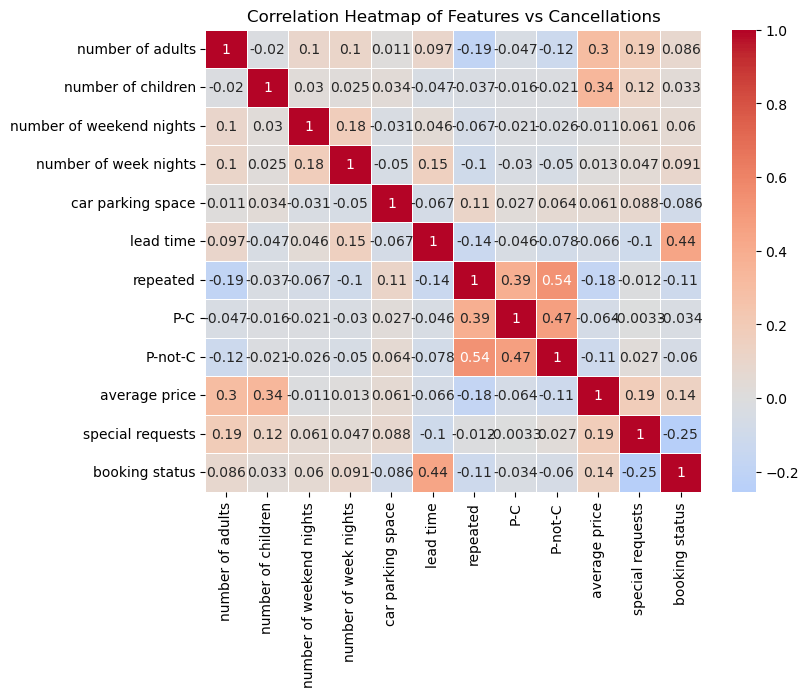

In [77]:
# Select only numeric columns for correlation
numeric_cols = data4.select_dtypes(include=['int64', 'float64'])

# Calculate correlation
correlation_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Heatmap of Features vs Cancellations", fontsize=12)
plt.show()

In [78]:
#Insight: Lead time, Special request, repeated and average price may have some relationship with booking status which needs to be explored further

In [79]:
data5=data[~((data['number of week nights'] == 0) & (data['number of weekend nights'] == 0))]

In [80]:
data5.shape

(36207, 17)

In [81]:
data5.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


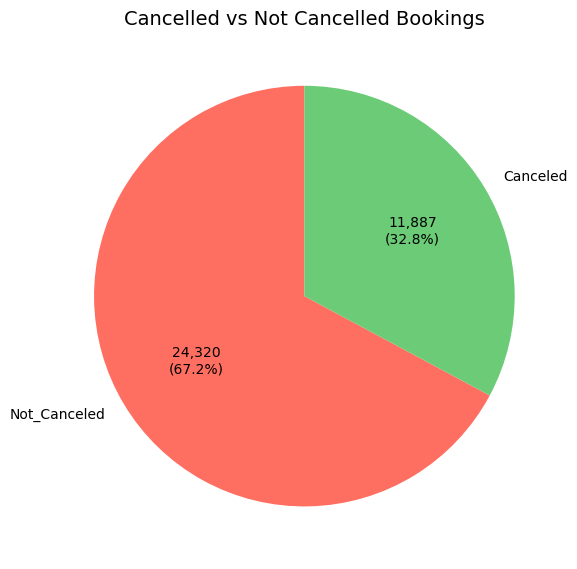

In [82]:
# Count the values in the booking status column
status_counts = data5['booking status'].value_counts()

# Custom label function to show count and percentage
def func(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{absolute:,}\n({pct:.1f}%)"  # Count on top, percentage below

# Plot the pie chart
plt.figure(figsize=(6,6))
plt.pie(
    status_counts,
    labels=status_counts.index,
    autopct=lambda pct: func(pct, status_counts),
    startangle=90,
    colors=['#FF6F61', '#6BCB77'],  # Custom colors
    textprops={'fontsize': 10}
)

plt.title('Cancelled vs Not Cancelled Bookings', fontsize=14)
plt.tight_layout()
plt.show()

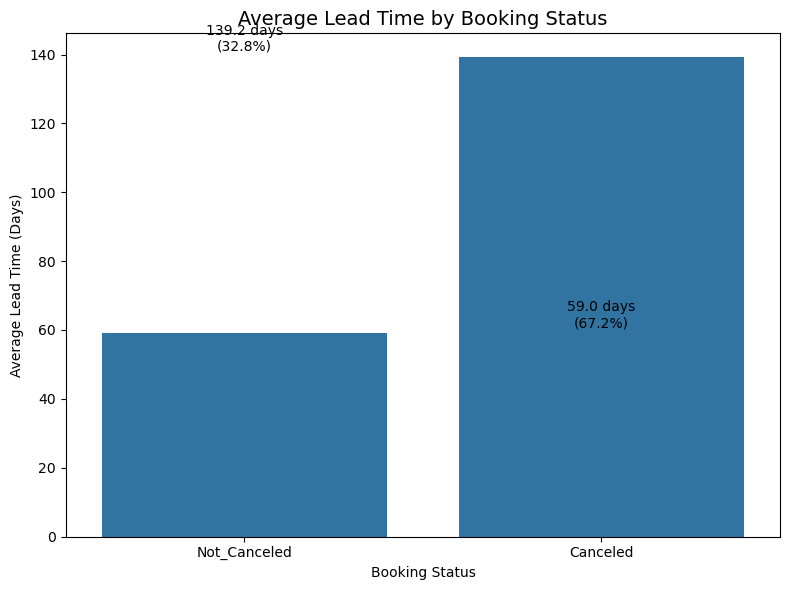

In [83]:
plt.figure(figsize=(8,6))

# --- Barplot ---
sns.barplot(
    x='booking status',
    y='lead time',
    data=data5,
    errorbar=None                    # Remove confidence intervals for cleaner bars
    )

# --- Calculate statistics ---
group_stats = data5.groupby('booking status').agg(
    avg_lead_time=('lead time', 'mean'),
    count=('lead time', 'count')
)

total_count = group_stats['count'].sum()

# --- Add labels above bars ---
for i, (status, row) in enumerate(group_stats.iterrows()):
    avg_time = row['avg_lead_time']
    percentage = (row['count'] / total_count) * 100

    # Format label with both mean and percentage
    label = f"{avg_time:.1f} days\n({percentage:.1f}%)"
    
    # Place the label just above the bar
    plt.text(
        i,                      # x position (bar index)
        avg_time + 1,           # y position slightly above the bar
        label,
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# --- Customize chart ---
plt.title('Average Lead Time by Booking Status', fontsize=14)
plt.xlabel('Booking Status')
plt.ylabel('Average Lead Time (Days)')
plt.tight_layout()
plt.show()

In [84]:
data5['lead time'].max()

443

In [85]:
# Define bin edges: from 0 to 450 in steps of 30
bins = np.arange(0, 451, 30)  # 0,30,60,...,450

# Create labels for bins
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Add a new column for lead time groups
data5['lead_time_group'] = pd.cut(data5['lead time'], bins=bins, labels=labels, include_lowest=True)

# Check distribution
print(data5['lead_time_group'].value_counts().sort_index())

lead_time_group
0-30       12364
30-60       6299
60-90       4503
90-120      3497
120-150     2268
150-180     2002
180-210     1519
210-240      903
240-270      941
270-300      787
300-330      671
330-360      205
360-390      146
390-420       60
420-450       42
Name: count, dtype: int64


C:\Users\SYDNEY\AppData\Local\Temp\ipykernel_35504\1045741676.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['lead_time_group'] = pd.cut(data5['lead time'], bins=bins, labels=labels, include_lowest=True)


C:\Users\SYDNEY\AppData\Local\Temp\ipykernel_35504\891303092.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = data5.groupby(['lead_time_group', 'booking status']).size().reset_index(name='count')


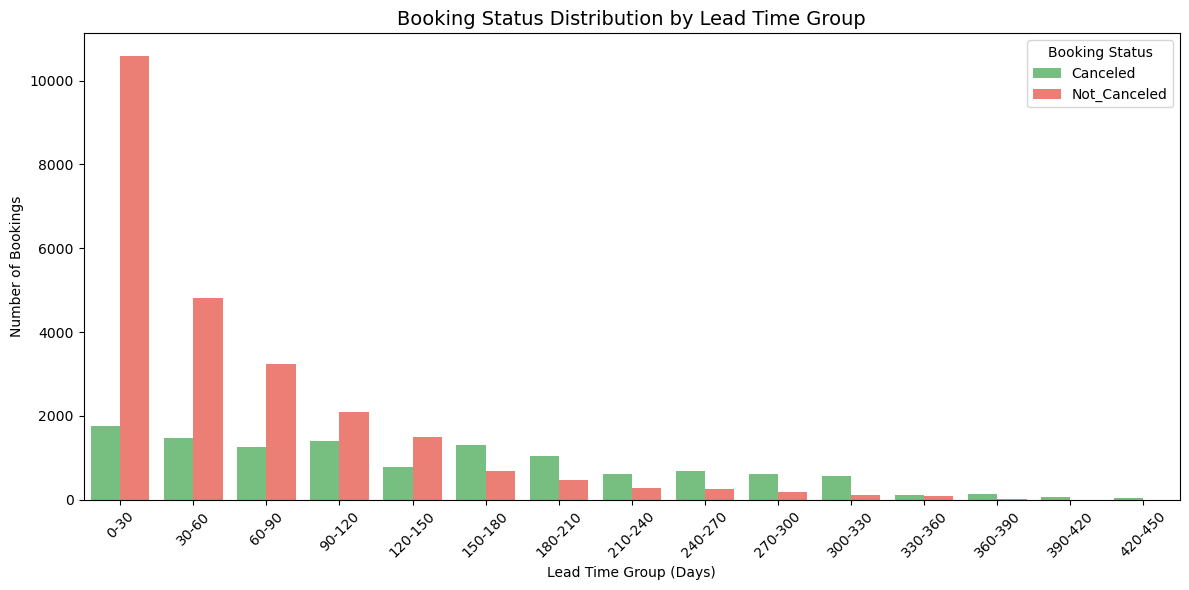

In [86]:
# Count of booking status for each lead time group
group_counts = data5.groupby(['lead_time_group', 'booking status']).size().reset_index(name='count')

plt.figure(figsize=(12,6))

sns.barplot(
    x='lead_time_group',
    y='count',
    hue='booking status',
    data=group_counts,
    palette=['#6BCB77','#FF6F61']
)

# Customize chart
plt.title('Booking Status Distribution by Lead Time Group', fontsize=14)
plt.xlabel('Lead Time Group (Days)')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title='Booking Status')
plt.tight_layout()
plt.show()

C:\Users\SYDNEY\AppData\Local\Temp\ipykernel_35504\1501831788.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data5.groupby('lead_time_group')['booking status']


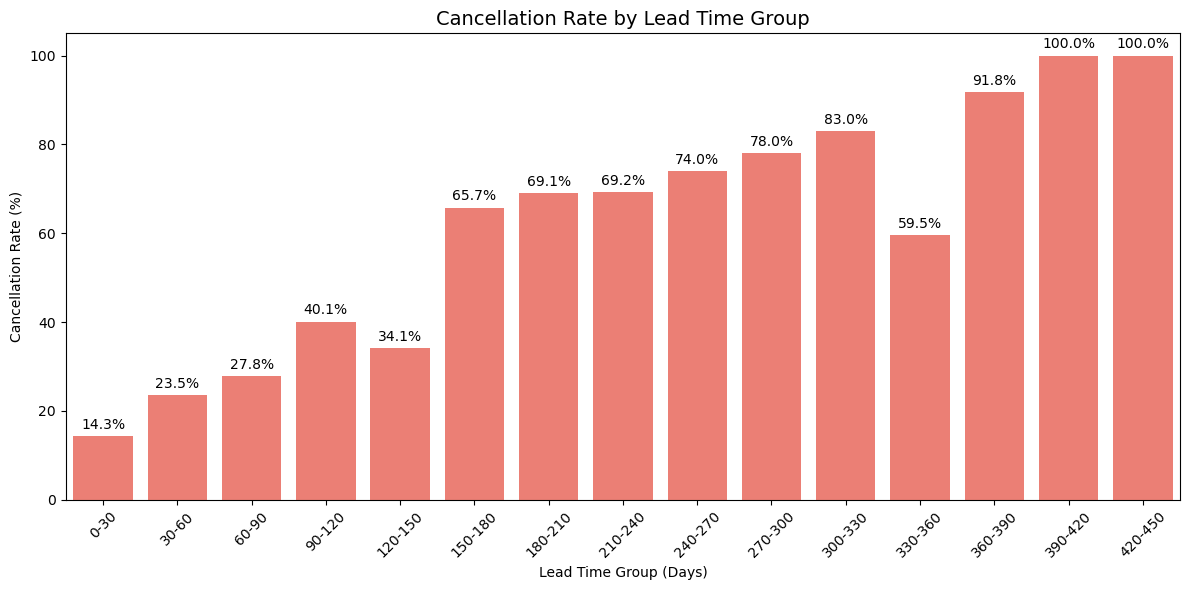

In [87]:
cancellation_rate = (
    data5.groupby('lead_time_group')['booking status']
    .apply(lambda x: (x == 'Canceled').mean() * 100)  # Convert to percentage
    .reset_index(name='Cancellation Rate (%)')
)

# --- Plot bar chart ---
plt.figure(figsize=(12,6))
sns.barplot(
    x='lead_time_group',
    y='Cancellation Rate (%)',
    data=cancellation_rate,
    color='#FF6F61'
)

# --- Add labels above bars ---
for i, row in cancellation_rate.iterrows():
    plt.text(
        i, 
        row['Cancellation Rate (%)'] + 1,       # position slightly above bar
        f"{row['Cancellation Rate (%)']:.1f}%", # format to 1 decimal place
        ha='center', 
        va='bottom',
        fontsize=10,
        color='black'
    )

# --- Customize chart ---
plt.title('Cancellation Rate by Lead Time Group', fontsize=14)
plt.xlabel('Lead Time Group (Days)')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

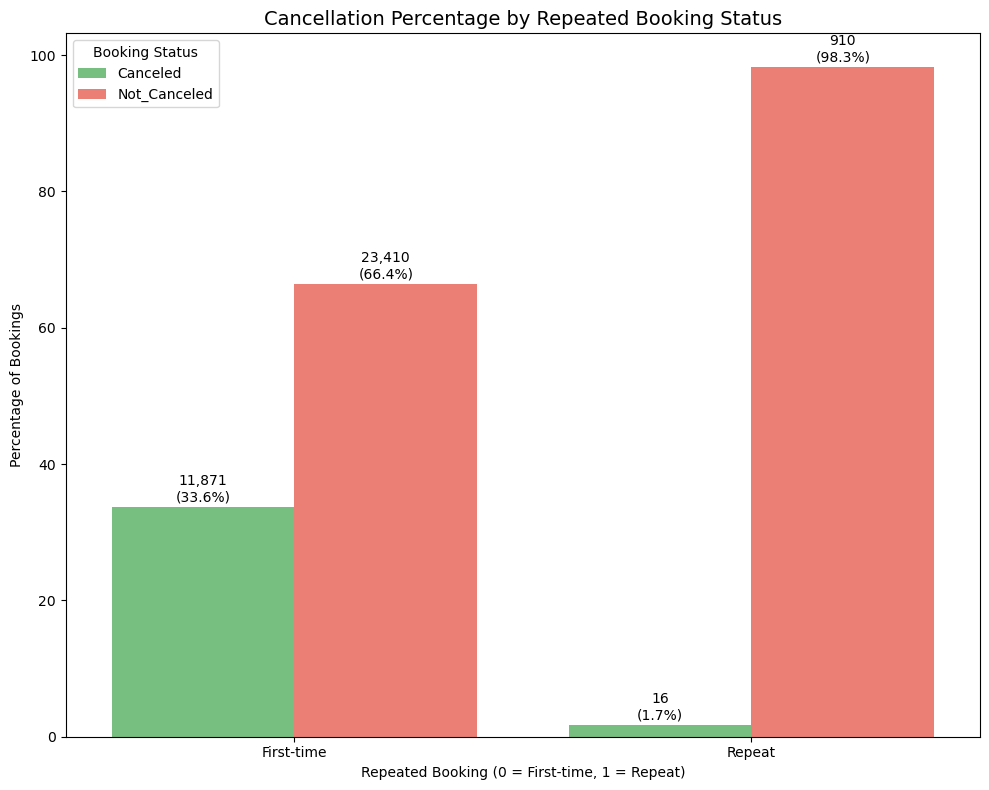

In [88]:
# 1) Counts by group
df = data5.groupby(['repeated', 'booking status']).size().reset_index(name='count')

# 2) Explicit plotting order
x_order = [0, 1]  # 0 = First-time, 1 = Repeat
# robust hue order that works with either spelling/underscore variants
hue_order = [h for h in ['Canceled','Not_Canceled'] if h in df['booking status'].unique()]

# 3) Percent within each 'repeated' group
df['percent'] = df['count'] / df.groupby('repeated')['count'].transform('sum') * 100

# 4) Pivot tables aligned to the exact plot order
counts_p  = (df.pivot(index='repeated', columns='booking status', values='count')
               .reindex(index=x_order, columns=hue_order).fillna(0))
perc_p    = (df.pivot(index='repeated', columns='booking status', values='percent')
               .reindex(index=x_order, columns=hue_order).fillna(0))

# 5) Plot percentage bars
plt.figure(figsize=(10,8))
ax = sns.barplot(
    x='repeated', y='percent', hue='booking status',
    data=df, order=x_order, hue_order=hue_order,
    palette=['#6BCB77','#FF6F61'] if len(hue_order)==2 else None
)

# 6) Add BOTH count and percent labels, aligned with containers
for h_idx, container in enumerate(ax.containers):           # one container per hue
    for x_idx, bar in enumerate(container):                 # one bar per x category
        c = counts_p.iloc[x_idx, h_idx]
        p = perc_p.iloc[x_idx, h_idx]
        ax.annotate(f"{int(c):,}\n({p:.1f}%)",
                    (bar.get_x() + bar.get_width()/2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10,
                    xytext=(0, 2), textcoords='offset points')

# 7) Cosmetics
ax.set_title('Cancellation Percentage by Repeated Booking Status', fontsize=14)
ax.set_xlabel('Repeated Booking (0 = First-time, 1 = Repeat)')
ax.set_ylabel('Percentage of Bookings')
ax.set_xticks([0,1])
ax.set_xticklabels(['First-time','Repeat'])
ax.legend(title='Booking Status')
plt.tight_layout()
plt.show()

C:\Users\SYDNEY\AppData\Local\Temp\ipykernel_35504\1181898974.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


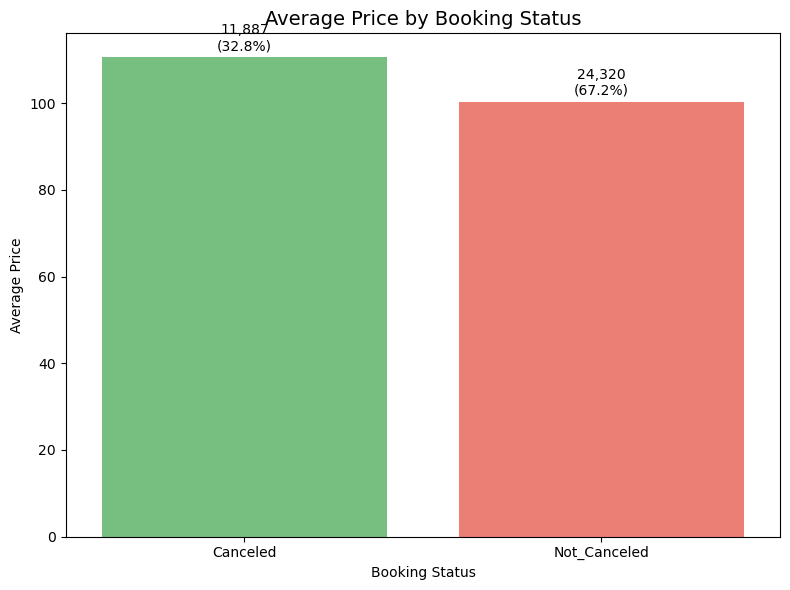

In [89]:
# --- Group by booking status and calculate stats ---
price_stats = data5.groupby('booking status').agg(
    avg_price=('average price', 'mean'),
    count=('average price', 'count')
).reset_index()

# Calculate percentage of each booking status
total_count = price_stats['count'].sum()
price_stats['percentage'] = (price_stats['count'] / total_count) * 100

# --- Plot bar chart of average price by booking status ---
plt.figure(figsize=(8,6))
ax = sns.barplot(
    x='booking status',
    y='avg_price',
    data=price_stats,
    palette=['#6BCB77','#FF6F61']
)

# --- Add both count and percentage labels above bars ---
for i, row in price_stats.iterrows():
    label = f"{row['count']:,}\n({row['percentage']:.1f}%)"
    ax.annotate(
        label,
        (i, row['avg_price']),
        ha='center', va='bottom',
        fontsize=10, color='black',
        xytext=(0, 3), textcoords='offset points'
    )

# --- Customize chart ---
plt.title('Average Price by Booking Status', fontsize=14)
plt.xlabel('Booking Status')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

In [90]:
# Define custom bin edges
bins = [0, 50, 100, 150, 200, np.inf]

# Define custom labels
labels = ['0-50', '51-100', '101-150', '151-200', '>200']

# Create a new column for price groups
data5['price_group'] = pd.cut(data5['average price'], bins=bins, labels=labels, include_lowest=True)

# Verify the binning
print(data5['price_group'].value_counts().sort_index())

price_group
0-50         832
51-100     17981
101-150    14174
151-200     2724
>200         496
Name: count, dtype: int64


C:\Users\SYDNEY\AppData\Local\Temp\ipykernel_35504\4010144661.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['price_group'] = pd.cut(data5['average price'], bins=bins, labels=labels, include_lowest=True)


In [91]:
# Group by price group and booking status
price_counts = data5.groupby(['price_group', 'booking status']).size().reset_index(name='count')

# Calculate percentage within each price group
totals = price_counts.groupby('price_group')['count'].transform('sum')
price_counts['percentage'] = (price_counts['count'] / totals) * 100

# Verify results
print(price_counts.head())

  price_group booking status  count  percentage
0        0-50       Canceled     42    5.048077
1        0-50   Not_Canceled    790   94.951923
2      51-100       Canceled   4812   26.761582
3      51-100   Not_Canceled  13169   73.238418
4     101-150       Canceled   5875   41.449132


C:\Users\SYDNEY\AppData\Local\Temp\ipykernel_35504\3013661507.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_counts = data5.groupby(['price_group', 'booking status']).size().reset_index(name='count')
C:\Users\SYDNEY\AppData\Local\Temp\ipykernel_35504\3013661507.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totals = price_counts.groupby('price_group')['count'].transform('sum')


C:\Users\SYDNEY\AppData\Local\Temp\ipykernel_35504\1538792582.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['price_group'] = pd.cut(data5['average price'], bins=bins, labels=labels, include_lowest=True)
C:\Users\SYDNEY\AppData\Local\Temp\ipykernel_35504\1538792582.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_counts = data5.groupby(['price_group', 'booking status']).size().reset_index(name='count')
C:\Users\SYDNEY\AppData\Local\Temp\ipykernel_35504\1538792582.py:16: FutureWarning: The default of observed=False is deprecated and will 

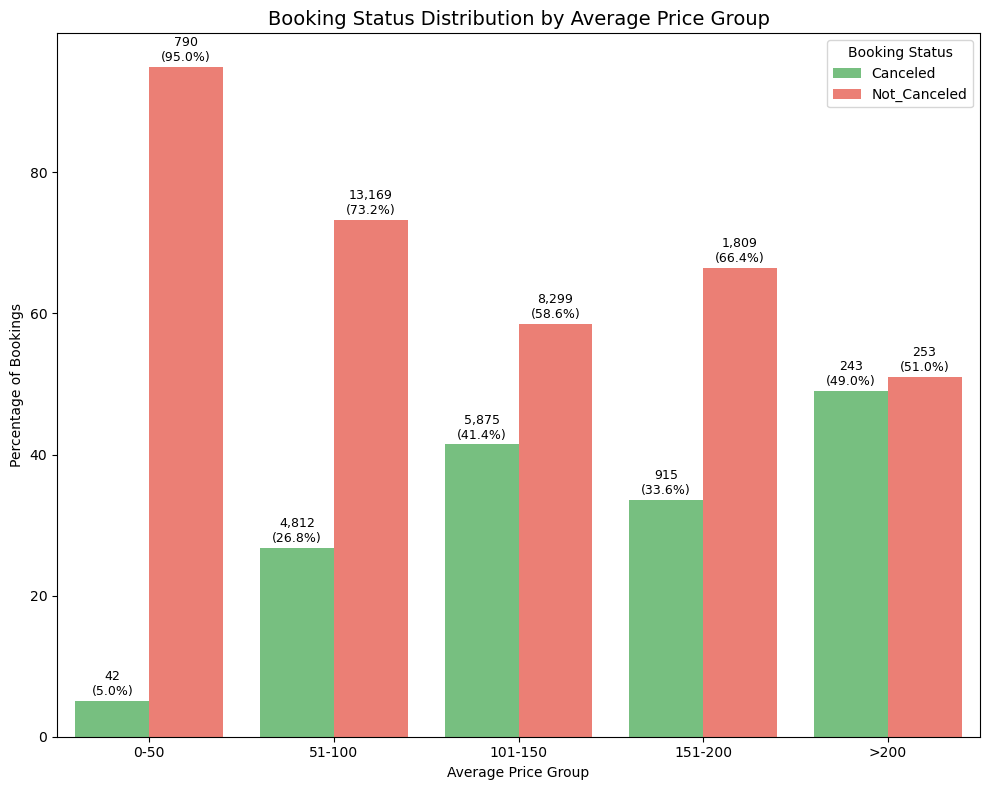

In [92]:
# ------------------------------
# 1. Create 5 custom bins
# ------------------------------
bins = [0, 50, 100, 150, 200, np.inf]
labels = ['0-50', '51-100', '101-150', '151-200', '>200']

data5['price_group'] = pd.cut(data5['average price'], bins=bins, labels=labels, include_lowest=True)

# ------------------------------
# 2. Group data by price group & booking status
# ------------------------------
price_counts = data5.groupby(['price_group', 'booking status']).size().reset_index(name='count')

# Calculate percentage within each price group
price_counts['percentage'] = (
    price_counts['count'] / price_counts.groupby('price_group')['count'].transform('sum') * 100
)

# Sort for consistency
price_counts = price_counts.sort_values(by=['price_group', 'booking status'])

# ------------------------------
# 3. Define explicit plotting order
# ------------------------------
x_order = labels  # X-axis order for price groups
hue_order = price_counts['booking status'].unique().tolist()  # Booking status order

# Create pivot tables for counts & percentages to align with the bar positions
counts_pivot = price_counts.pivot(index='price_group', columns='booking status', values='count').reindex(index=x_order, columns=hue_order)
percent_pivot = price_counts.pivot(index='price_group', columns='booking status', values='percentage').reindex(index=x_order, columns=hue_order)

# ------------------------------
# 4. Plot the percentage chart
# ------------------------------
plt.figure(figsize=(10,8))
ax = sns.barplot(
    x='price_group', y='percentage',
    hue='booking status', data=price_counts,
    order=x_order, hue_order=hue_order,
    palette=['#6BCB77','#FF6F61']
)

# ------------------------------
# 5. Annotate each bar with counts & percentages
# ------------------------------
for h_idx, container in enumerate(ax.containers):  # Loop through each hue group
    for x_idx, bar in enumerate(container):        # Loop through each price group
        c = counts_pivot.iloc[x_idx, h_idx]        # count
        p = percent_pivot.iloc[x_idx, h_idx]       # percentage
        ax.annotate(
            f"{int(c):,}\n({p:.1f}%)",
            (bar.get_x() + bar.get_width()/2., bar.get_height()),
            ha='center', va='bottom', fontsize=9,
            xytext=(0,2), textcoords='offset points'
        )

# ------------------------------
# 6. Final chart formatting
# ------------------------------
plt.title('Booking Status Distribution by Average Price Group', fontsize=14)
plt.xlabel('Average Price Group')
plt.ylabel('Percentage of Bookings')
plt.xticks(rotation=0)
plt.legend(title='Booking Status')
plt.tight_layout()
plt.show()


In [93]:
# Group by special requests and booking status
sr_counts = data5.groupby(['special requests', 'booking status']).size().reset_index(name='count')

# Calculate percentage of each booking status within each number of special requests
totals = sr_counts.groupby('special requests')['count'].transform('sum')
sr_counts['percentage'] = (sr_counts['count'] / totals) * 100

# Verify
print(sr_counts.head())

   special requests booking status  count  percentage
0                 0       Canceled   8545   43.274587
1                 0   Not_Canceled  11201   56.725413
2                 1       Canceled   2705   23.843103
3                 1   Not_Canceled   8640   76.156897
4                 2       Canceled    637   14.626866


C:\Users\SYDNEY\AppData\Local\Temp\ipykernel_35504\2052201697.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([str(x) for x in x_order])


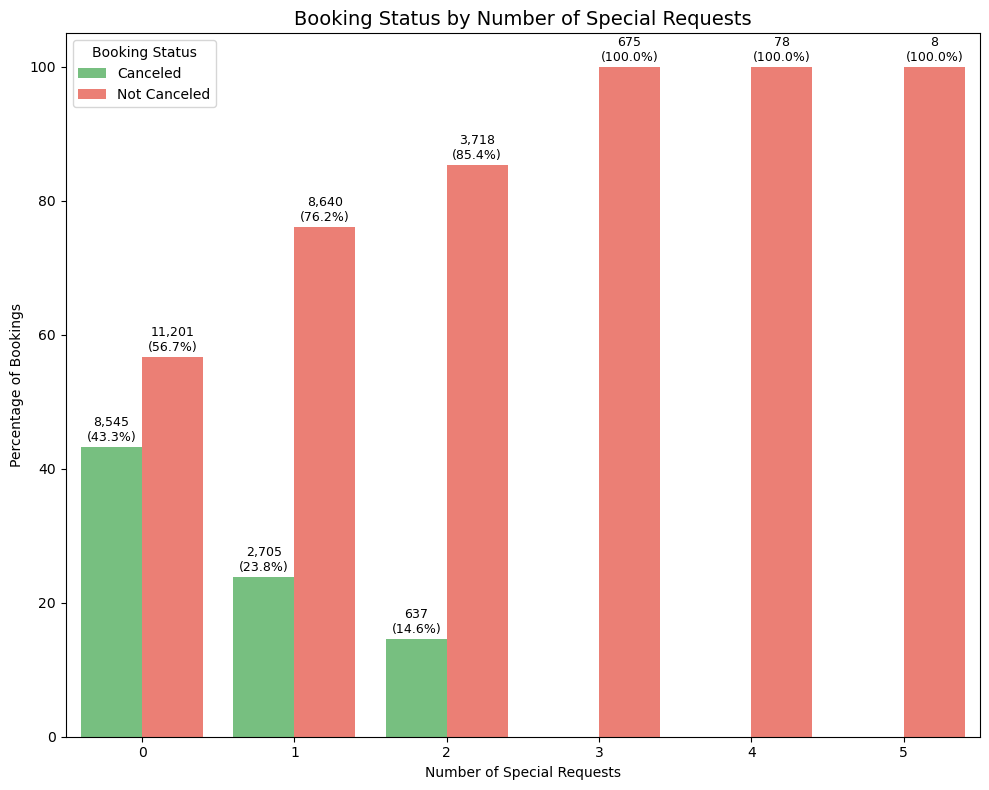

In [94]:
# --- Clean a copy & (optionally) prettify status labels ---
df = data5.copy()
df['booking status'] = df['booking status'].astype(str).str.replace('_', ' ')

# --- Group and compute percentages within each special-requests level ---
sr_counts = (
    df.groupby(['special requests', 'booking status'])
      .size().reset_index(name='count')
)

sr_counts['percent'] = (
    sr_counts['count'] / sr_counts.groupby('special requests')['count'].transform('sum') * 100
)

# --- Explicit plotting order ---
x_order   = sorted(sr_counts['special requests'].unique())                 # e.g., [0,1,2,3,4,5]
hue_order = [h for h in ['Canceled', 'Cancelled', 'Not Canceled'] if h in sr_counts['booking status'].unique()]
# If your labels are 'Not Canceled' with underscore, the replace above handled it.

# --- Build a lookup for (x, hue) -> (count, percent) ---
key = list(zip(sr_counts['special requests'], sr_counts['booking status']))
lookup = {k: (c, p) for k, c, p in zip(key, sr_counts['count'], sr_counts['percent'])}

# --- Percentage bar chart ---
plt.figure(figsize=(10,8))
ax = sns.barplot(
    x='special requests', y='percent', hue='booking status',
    data=sr_counts, order=x_order, hue_order=hue_order,
    palette=['#6BCB77', '#FF6F61'] if len(hue_order) == 2 else None
)

# --- Annotate each existing bar with the correct count + percent ---
for h_idx, status in enumerate(hue_order):
    # x categories where this status exists (in x_order)
    xs_present = [x for x in x_order if (x, status) in lookup]
    for j, bar in enumerate(ax.containers[h_idx]):  # bars actually drawn for this hue
        xcat = xs_present[j]
        count, pct = lookup[(xcat, status)]
        ax.annotate(
            f"{int(count):,}\n({pct:.1f}%)",
            (bar.get_x() + bar.get_width()/2, bar.get_height()),
            ha='center', va='bottom', fontsize=9,
            xytext=(0, 2), textcoords='offset points'
        )

# --- Cosmetics ---
ax.set_title('Booking Status by Number of Special Requests', fontsize=14)
ax.set_xlabel('Number of Special Requests')
ax.set_ylabel('Percentage of Bookings')
ax.set_xticklabels([str(x) for x in x_order])
ax.legend(title='Booking Status')
plt.tight_layout(); plt.show()

In [95]:
# Group by market segment and booking status
segment_counts = data5.groupby(['market segment type', 'booking status']).size().reset_index(name='count')

# Calculate percentage within each market segment
segment_counts['percentage'] = (
    segment_counts['count'] / segment_counts.groupby('market segment type')['count'].transform('sum') * 100
)

# Sort for clean plotting
segment_counts = segment_counts.sort_values(by=['market segment type', 'booking status'])

segment_counts.head(10)

,market segment type,booking status,count,percentage
0,Aviation,Canceled,37,29.600000
1,Aviation,Not_Canceled,88,70.400000
2,Complementary,Not_Canceled,378,100.000000
3,Corporate,Canceled,220,10.907288
4,Corporate,Not_Canceled,1797,89.092712
5,Offline,Canceled,3154,29.949672
6,Offline,Not_Canceled,7377,70.050328
7,Online,Canceled,8476,36.603904
8,Online,Not_Canceled,14680,63.396096


C:\Users\SYDNEY\AppData\Local\Temp\ipykernel_35504\3948362542.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right')


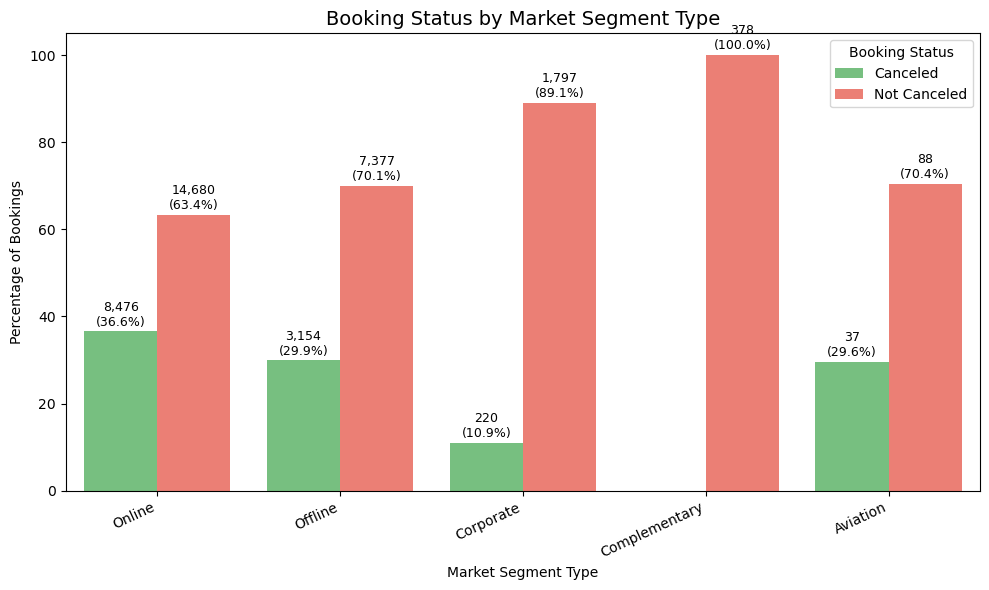

In [96]:
# --- tidy a copy; normalize status labels (underscores -> spaces) ---
df = data5.copy()
df['booking status'] = df['booking status'].astype(str).str.replace('_', ' ', regex=False)

# --- aggregate by market segment type and booking status ---
seg = (df.groupby(['market segment type', 'booking status'])
         .size().reset_index(name='count'))
seg['percent'] = seg['count'] / seg.groupby('market segment type')['count'].transform('sum') * 100

# --- explicit plot order ---
# Sort by total bookings per market segment type
x_order = (seg.groupby('market segment type')['count']
             .sum().sort_values(ascending=False).index.tolist())
hue_order = [h for h in ['Canceled', 'Cancelled', 'Not Canceled']
             if h in seg['booking status'].unique()]

# --- lookup for labels: (segment type, status) -> (count, percent) ---
lookup = {(r['market segment type'], r['booking status']): (int(r['count']), float(r['percent']))
          for _, r in seg.iterrows()}

# --- plot percentage bars ---
plt.figure(figsize=(10,6))
ax = sns.barplot(
    x='market segment type', y='percent', hue='booking status',
    data=seg, order=x_order, hue_order=hue_order,
    palette=['#6BCB77', '#FF6F61'] if len(hue_order) == 2 else None
)

# --- annotate with both count and percent ---
for h_idx, status in enumerate(hue_order):
    xs_present = [x for x in x_order if (x, status) in lookup]  # categories that exist for this hue
    for j, bar in enumerate(ax.containers[h_idx]):               # bars drawn for this hue
        if j >= len(xs_present):
            continue
        xcat = xs_present[j]
        c, p = lookup[(xcat, status)]
        ax.annotate(f"{c:,}\n({p:.1f}%)",
                    (bar.get_x() + bar.get_width()/2, bar.get_height()),
                    ha='center', va='bottom', fontsize=9,
                    xytext=(0, 2), textcoords='offset points')

# --- final touches ---
ax.set_title('Booking Status by Market Segment Type', fontsize=14)
ax.set_xlabel('Market Segment Type')
ax.set_ylabel('Percentage of Bookings')
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right')
ax.legend(title='Booking Status')
plt.tight_layout()
plt.show()

C:\Users\SYDNEY\AppData\Local\Temp\ipykernel_35504\38225983.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right')


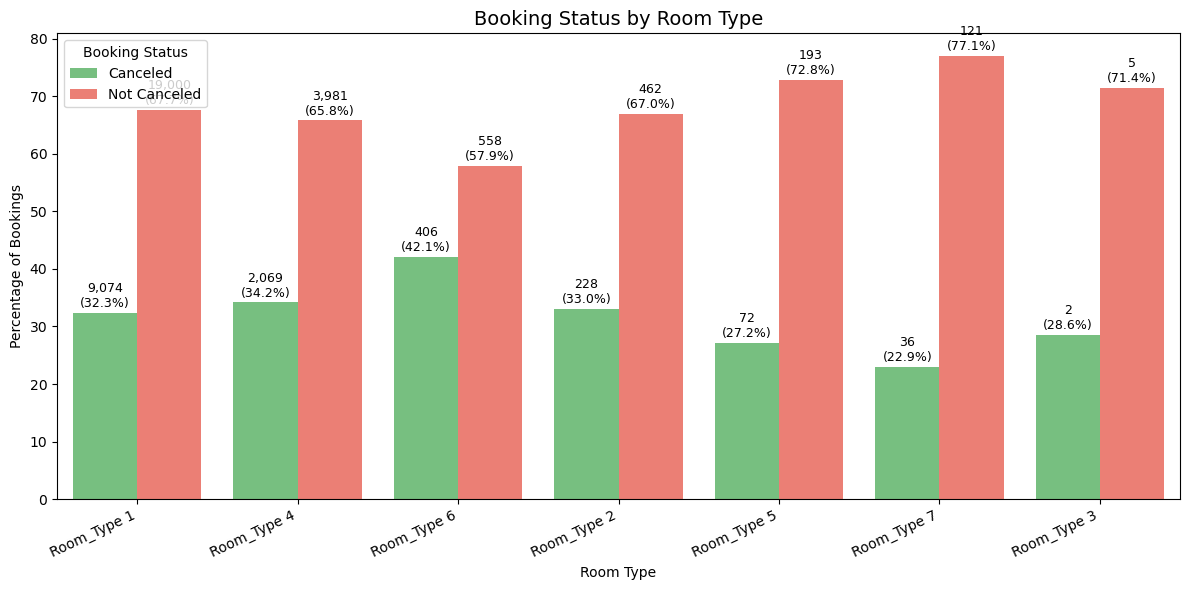

In [97]:
# --- tidy a copy; normalize status text (underscores -> spaces) ---
df = data5.copy()
df['booking status'] = df['booking status'].astype(str).str.replace('_', ' ', regex=False)

# --- aggregate counts & percentages within each room type ---
rt = (df.groupby(['room type', 'booking status'])
        .size().reset_index(name='count'))
rt['percent'] = rt['count'] / rt.groupby('room type')['count'].transform('sum') * 100

# --- explicit plot order to keep bars/labels aligned ---
x_order = (rt.groupby('room type')['count']
             .sum().sort_values(ascending=False).index.tolist())  # or use sorted(rt['room type'].unique())
hue_order = [h for h in ['Canceled', 'Cancelled', 'Not Canceled']
             if h in rt['booking status'].unique()]

# --- lookup dict for labels: (room type, status) -> (count, percent) ---
lookup = {(r['room type'], r['booking status']): (int(r['count']), float(r['percent']))
          for _, r in rt.iterrows()}

# --- plot percentage bars ---
plt.figure(figsize=(12,6))
ax = sns.barplot(
    x='room type', y='percent', hue='booking status',
    data=rt, order=x_order, hue_order=hue_order,
    palette=['#6BCB77', '#FF6F61'] if len(hue_order) == 2 else None
)

# --- annotate each bar with Count + Percent, aligned to containers ---
for h_idx, status in enumerate(hue_order):                # one container per hue
    xs_present = [x for x in x_order if (x, status) in lookup]
    for j, bar in enumerate(ax.containers[h_idx]):        # bars actually drawn for this hue
        if j >= len(xs_present):
            continue
        xcat = xs_present[j]
        c, p = lookup[(xcat, status)]
        ax.annotate(f"{c:,}\n({p:.1f}%)",
                    (bar.get_x() + bar.get_width()/2, bar.get_height()),
                    ha='center', va='bottom', fontsize=9,
                    xytext=(0, 2), textcoords='offset points')

# --- cosmetics ---
ax.set_title('Booking Status by Room Type', fontsize=14)
ax.set_xlabel('Room Type')
ax.set_ylabel('Percentage of Bookings')
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right')
ax.legend(title='Booking Status')
plt.tight_layout()
plt.show()

In [98]:
#Further Data Preprocessing to ensure machine learning ready dataset

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [100]:
data1= data.drop(["Booking_ID","P-C","P-not-C","date of reservation"], axis=1) #dropping irrelevant columns

In [101]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36285 non-null  object 
 5   car parking space         36285 non-null  int64  
 6   room type                 36285 non-null  object 
 7   lead time                 36285 non-null  int64  
 8   market segment type       36285 non-null  object 
 9   repeated                  36285 non-null  int64  
 10  average price             36285 non-null  float64
 11  special requests          36285 non-null  int64  
 12  booking status            36285 non-null  object 
dtypes: float64(1), int64(8), object(4)
memory usage: 3.6+ MB


In [102]:
data2=data1.copy() #creating a copy of raw data (with outliers present but without irrelevant columns)

In [103]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36285 non-null  object 
 5   car parking space         36285 non-null  int64  
 6   room type                 36285 non-null  object 
 7   lead time                 36285 non-null  int64  
 8   market segment type       36285 non-null  object 
 9   repeated                  36285 non-null  int64  
 10  average price             36285 non-null  float64
 11  special requests          36285 non-null  int64  
 12  booking status            36285 non-null  object 
dtypes: float64(1), int64(8), object(4)
memory usage: 3.6+ MB


In [104]:
data2['number of children'] = data2['number of children'].clip(upper=3) #clipping max number of children to 3 thus handling outliers in this column

In [105]:
data2['number of children'].value_counts()

number of children
0    33583
1     1622
2     1058
3       22
Name: count, dtype: int64

In [106]:
other_outlier_affected_columns = ["number of weekend nights","number of week nights","lead time","average price"]
q1=data2[other_outlier_affected_columns].quantile(0.25)
q3=data2[other_outlier_affected_columns].quantile(0.75)
iqr=q3-q1
lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)

#clipping other affected columns with significant outliers to upper and lower bound
data2[other_outlier_affected_columns]=data2[other_outlier_affected_columns].clip(lower=lower_bound, upper=upper_bound, axis=1)

In [107]:
numerical_columns2 = data2.select_dtypes(include='number')

In [108]:
len(numerical_columns2.columns)

9

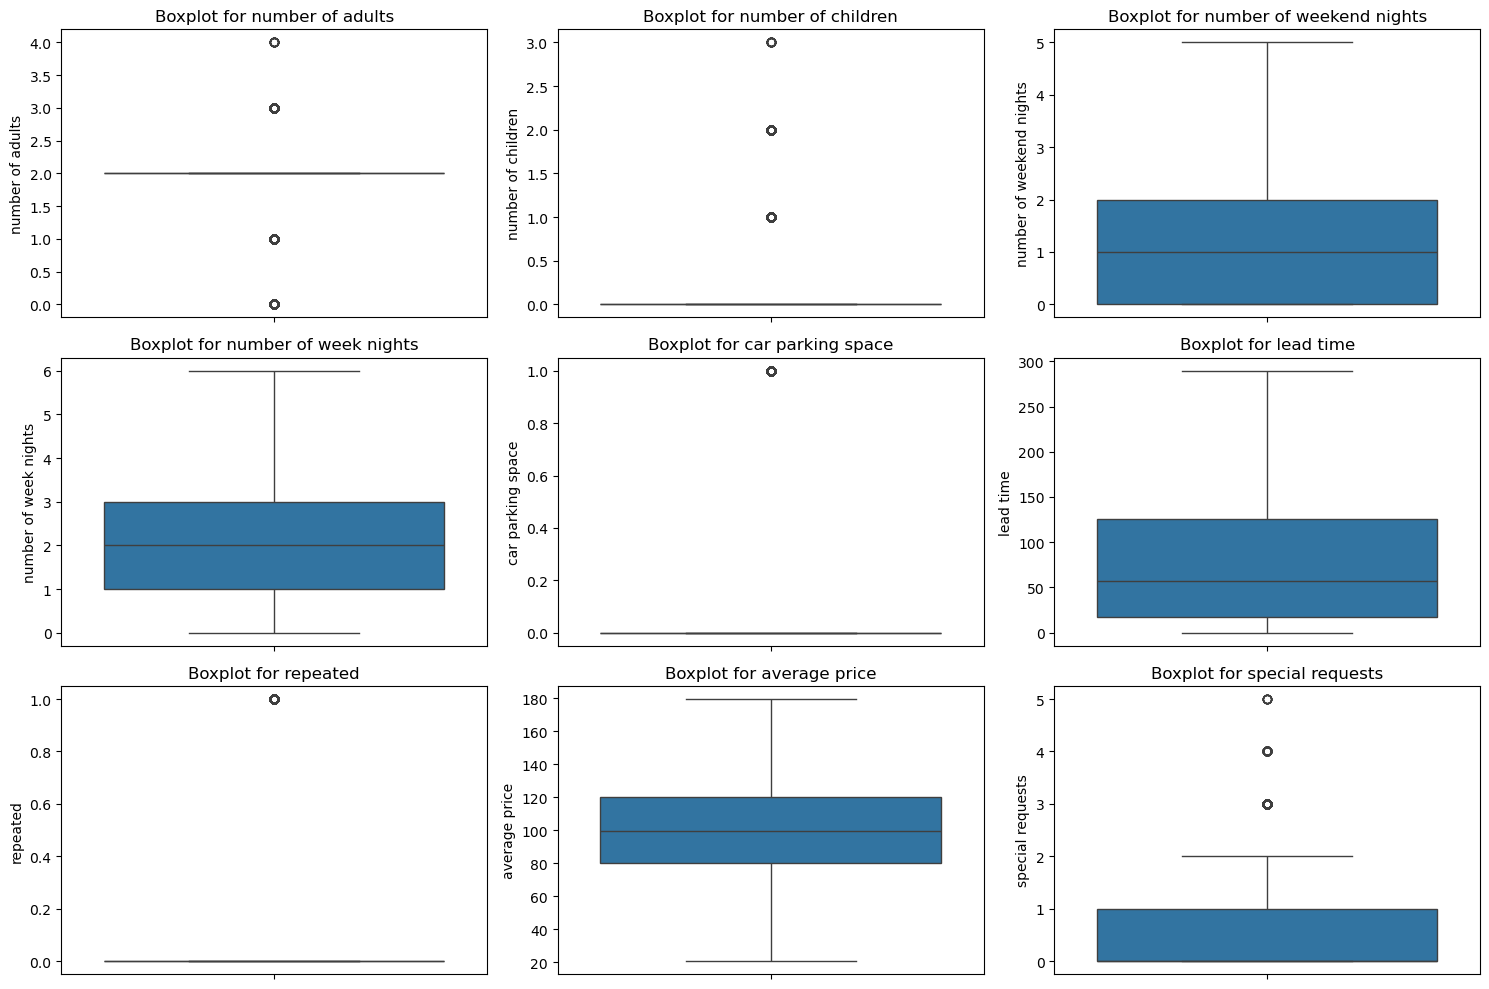

In [109]:
fig,ax = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
ax = ax.flatten()
for idx, col in enumerate(numerical_columns2):
    sns.boxplot(data2[col], ax=ax[idx])
    ax[idx].set_title(f"Boxplot for {col}")
plt.tight_layout()
plt.show()

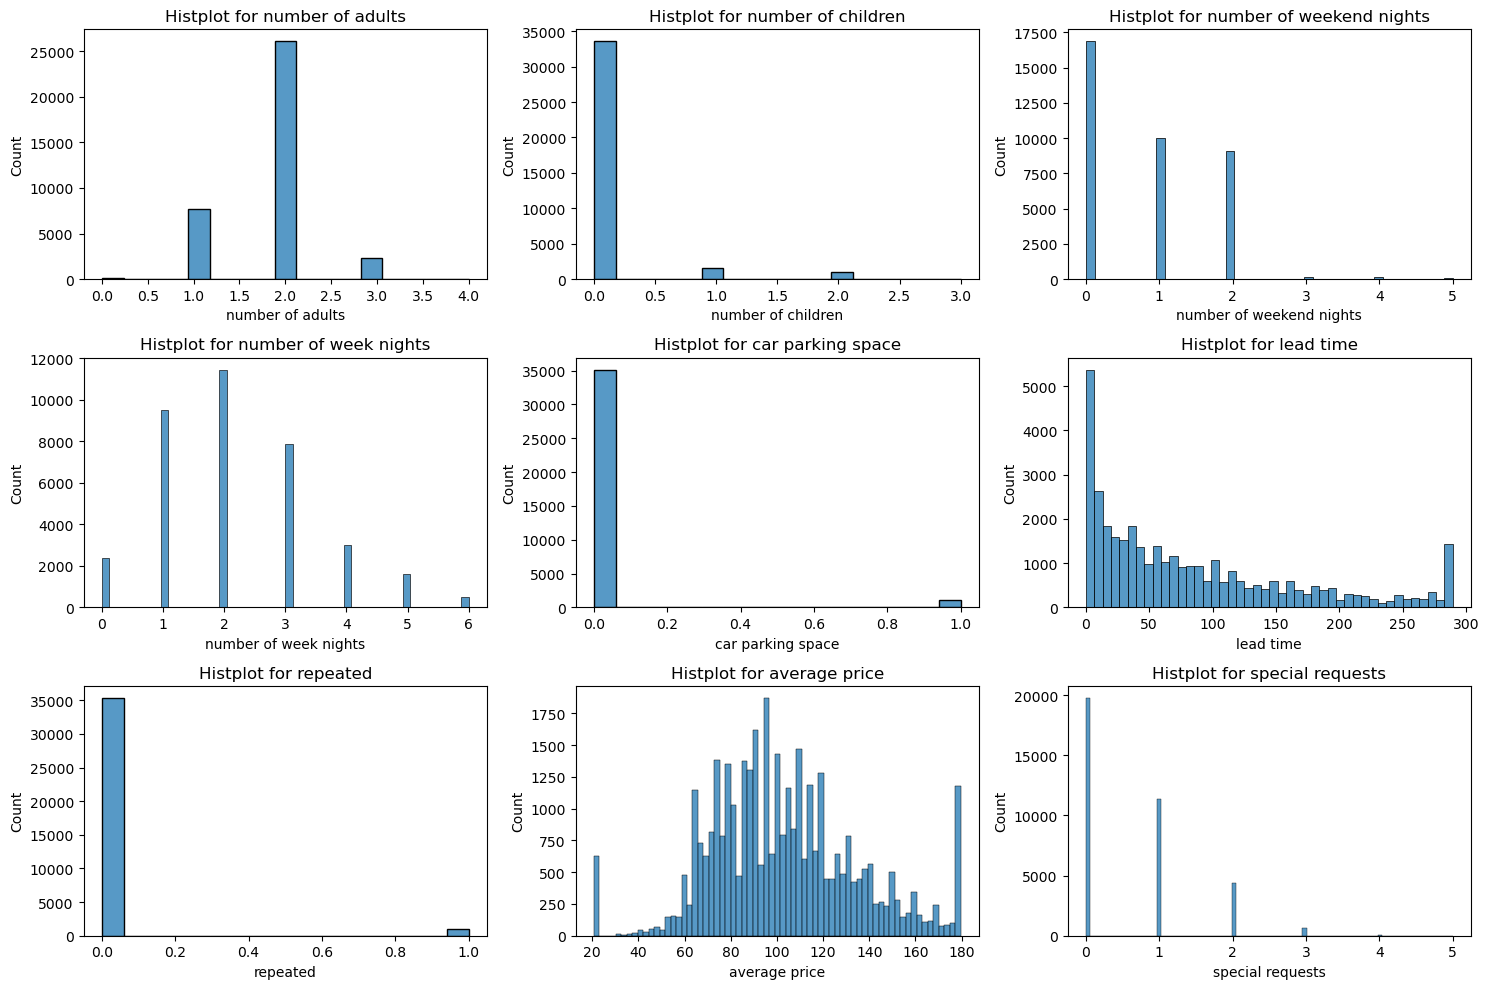

In [110]:
fig,ax = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
ax = ax.flatten()
for idx, col in enumerate(numerical_columns2):
    sns.histplot(data2[col], ax=ax[idx])
    ax[idx].set_title(f"Histplot for {col}")
plt.tight_layout()
plt.show()

In [111]:
data2['number of weekend nights'].value_counts()

number of weekend nights
0    16876
1    10000
2     9072
3      153
4      129
5       55
Name: count, dtype: int64

In [112]:
data2['number of week nights'].value_counts()

number of week nights
2    11447
1     9488
3     7842
4     2992
0     2387
5     1616
6      513
Name: count, dtype: int64

In [113]:
#Removing rows where number of week nights booked and number of weekend nights booked equal zero i.e invalid bookings
data2a = data2[~((data2['number of week nights'] == 0) & (data2['number of weekend nights'] == 0))]

In [114]:
data2a.shape

(36207, 13)

In [115]:
data2.shape

(36285, 13)

In [116]:
data2a.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,average price,special requests,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224.0,Offline,0,88.00,0,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5.0,Online,0,106.68,1,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1.0,Online,0,50.00,0,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211.0,Online,0,100.00,1,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48.0,Online,0,77.00,0,Canceled


In [117]:
#Encode categorical variables

In [118]:
!pip install scikit-learn

In [119]:
from sklearn.preprocessing import LabelEncoder

In [120]:
encoder=LabelEncoder() #Initialising the encoder

In [121]:
data2b=data2a.copy() #copy without adjusted meal plan

In [122]:
col_to_encode= ["type of meal","room type","market segment type","booking status"]
encoders={}
for col in col_to_encode:
    data2b[col]=encoder.fit_transform(data2b[col])
    encoders[col]=encoder    

In [123]:
data2b.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,average price,special requests,booking status
0,1,1,2,5,0,0,0,224.0,3,0,88.00,0,1
1,1,0,1,3,3,0,0,5.0,4,0,106.68,1,1
2,2,1,1,3,0,0,0,1.0,4,0,50.00,0,0
3,1,0,0,2,0,0,0,211.0,4,0,100.00,1,0
4,1,0,1,2,3,0,0,48.0,4,0,77.00,0,0


In [124]:
num_cols_to_scale=["number of adults","number of children","number of weekend nights",
                   "number of week nights","lead time","average price","special requests"]

In [125]:
from sklearn.preprocessing import StandardScaler  #Standard Scaler chosen because numerical dataset has normal distribution or only slightly skewed

In [126]:
scaler=StandardScaler()  #Initialising the scaler

In [127]:
data2b[num_cols_to_scale]=scaler.fit_transform(data2b[num_cols_to_scale])  #Scaling the dataset

In [128]:
data2b.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,average price,special requests,booking status
0,-1.629573,2.267436,1.369817,2.187052,0,0,0,1.716208,3,0,-0.481091,-0.787847,1
1,-1.629573,-0.265642,0.216935,0.634389,3,0,0,-0.965514,4,0,0.112271,0.483800,1
2,0.298217,2.267436,0.216935,0.634389,0,0,0,-1.014495,4,0,-1.688144,-0.787847,0
3,-1.629573,-0.265642,-0.935946,-0.141943,0,0,0,1.557019,4,0,-0.099916,0.483800,0
4,-1.629573,-0.265642,0.216935,-0.141943,3,0,0,-0.438966,4,0,-0.830501,-0.787847,0


In [129]:
data2b["booking status"].value_counts()  #Assessing for class imbalance

booking status
1    24320
0    11887
Name: count, dtype: int64

In [130]:
data2b["booking status"].value_counts(normalize=True)*100

booking status
1    67.169332
0    32.830668
Name: proportion, dtype: float64

In [131]:
#Obvious class imbalance noted

<Axes: xlabel='booking status', ylabel='count'>

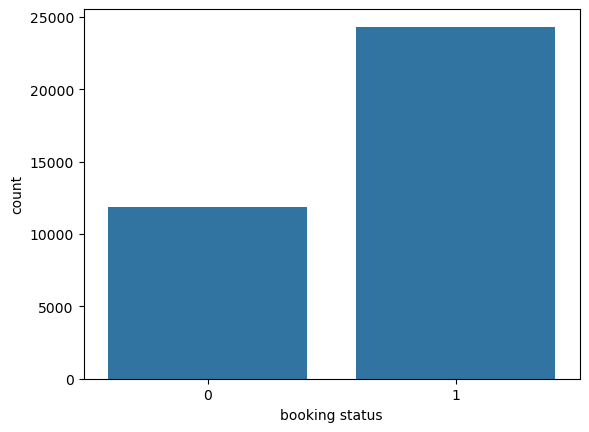

In [132]:
sns.countplot(x=data2b["booking status"])

In [133]:
!pip install imbalanced-learn

In [134]:
from imblearn.over_sampling import SMOTE

In [135]:
# Defining the feature and target variables
x=data2b.drop("booking status",axis=1)
y=data2b["booking status"]

In [136]:
smote=SMOTE(random_state=42) #Initialising smote

In [137]:
x_resampled, y_resampled = smote.fit_resample(x,y)  #handling class imbalance by oversampling using smote

In [138]:
y_resampled.value_counts()

booking status
1    24320
0    24320
Name: count, dtype: int64

In [139]:
y.value_counts()

booking status
1    24320
0    11887
Name: count, dtype: int64

In [140]:
resampled_data=pd.DataFrame(x_resampled,columns=x.columns)  #writing resampled data into a dataframe

In [141]:
resampled_data["booking status"]=y_resampled

In [142]:
resampled_data.shape

(48640, 13)

In [143]:
resampled_data.to_csv('cleaned_rebalanced_booking_cancellation2b.csv', index=False)  #converting new dataframe into a csv file

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)  #Data Splitting

In [146]:
y_train.value_counts(normalize=True)*100

booking status
1    50.046258
0    49.953742
Name: proportion, dtype: float64

In [147]:
y_test.value_counts(normalize=True)*100

booking status
0    50.185033
1    49.814967
Name: proportion, dtype: float64

In [148]:
from sklearn.linear_model import LogisticRegression #Importing baseline model

In [149]:
model=LogisticRegression(random_state=42)  #Initialising model

In [150]:
model.fit(x_train,y_train)  #training model

LogisticRegression(random_state=42)

In [151]:
y_pred=model.predict(x_test)  #predicting on the test data using trained model

In [152]:
#Checking accuracy of prediction
from sklearn.metrics import classification_report, confusion_matrix
report=classification_report(y_test,y_pred)

In [153]:
print(report)

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      4882
           1       0.78      0.77      0.77      4846

    accuracy                           0.78      9728
   macro avg       0.78      0.78      0.78      9728
weighted avg       0.78      0.78      0.78      9728



In [154]:
# Importing multiple classification models after baseline model training
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [155]:
!pip install xgboost

In [156]:
from xgboost import XGBClassifier

Training Logistic Regression...
Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      4882
           1       0.78      0.77      0.77      4846

    accuracy                           0.78      9728
   macro avg       0.78      0.78      0.78      9728
weighted avg       0.78      0.78      0.78      9728



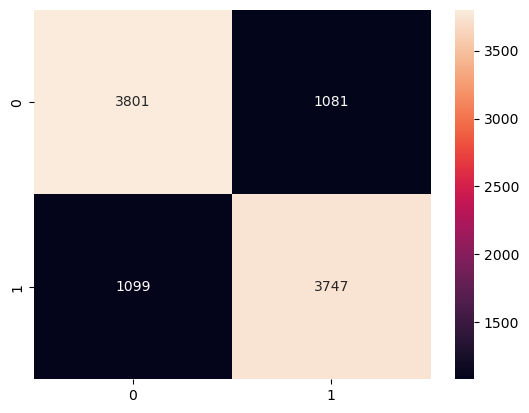

Training Random Forest...
Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4882
           1       0.90      0.90      0.90      4846

    accuracy                           0.90      9728
   macro avg       0.90      0.90      0.90      9728
weighted avg       0.90      0.90      0.90      9728



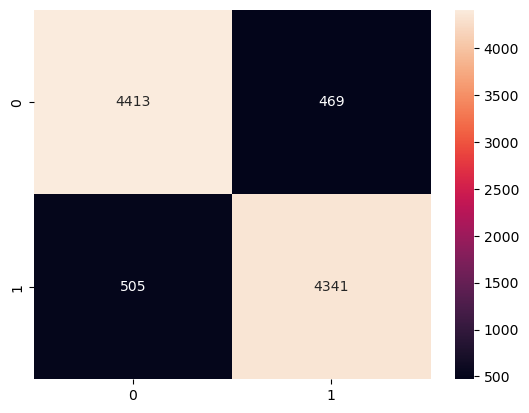

Training Gradient Boosting...
Gradient Boosting Classification Report
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      4882
           1       0.81      0.84      0.83      4846

    accuracy                           0.82      9728
   macro avg       0.82      0.82      0.82      9728
weighted avg       0.82      0.82      0.82      9728



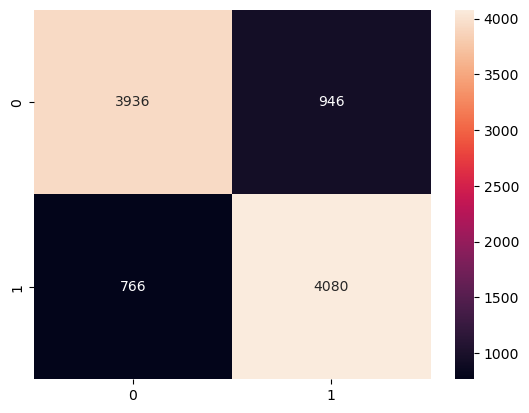

Training Ada Boost...
Ada Boost Classification Report
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      4882
           1       0.78      0.78      0.78      4846

    accuracy                           0.78      9728
   macro avg       0.78      0.78      0.78      9728
weighted avg       0.78      0.78      0.78      9728



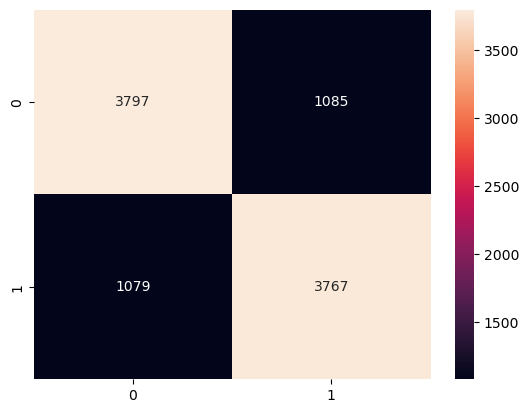

Training SVC...
SVC Classification Report
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      4882
           1       0.81      0.80      0.80      4846

    accuracy                           0.80      9728
   macro avg       0.80      0.80      0.80      9728
weighted avg       0.80      0.80      0.80      9728



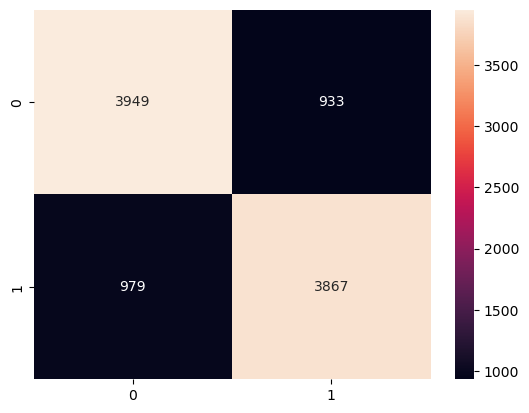

Training KNeighbors Classifier...
KNeighbors Classifier Classification Report
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      4882
           1       0.89      0.83      0.86      4846

    accuracy                           0.86      9728
   macro avg       0.87      0.86      0.86      9728
weighted avg       0.87      0.86      0.86      9728



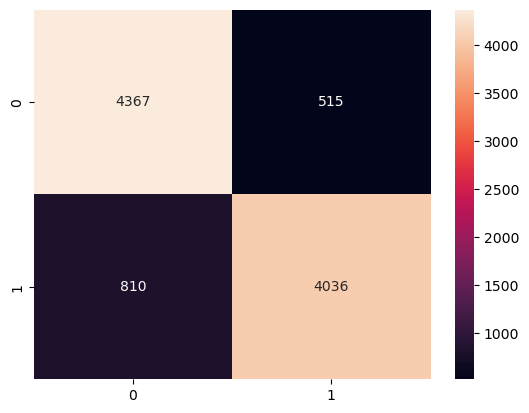

Training Decision Tree...
Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      4882
           1       0.87      0.86      0.86      4846

    accuracy                           0.87      9728
   macro avg       0.87      0.87      0.87      9728
weighted avg       0.87      0.87      0.87      9728



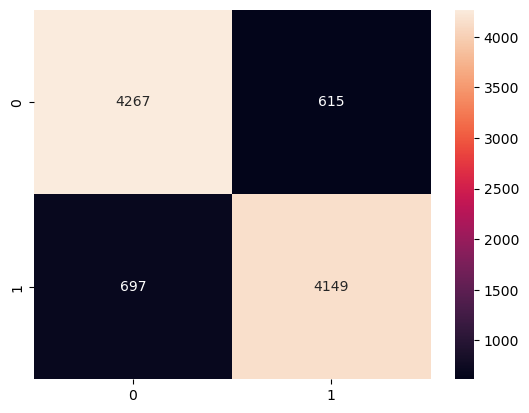

Training XGBoost...
XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4882
           1       0.87      0.88      0.87      4846

    accuracy                           0.87      9728
   macro avg       0.87      0.87      0.87      9728
weighted avg       0.87      0.87      0.87      9728



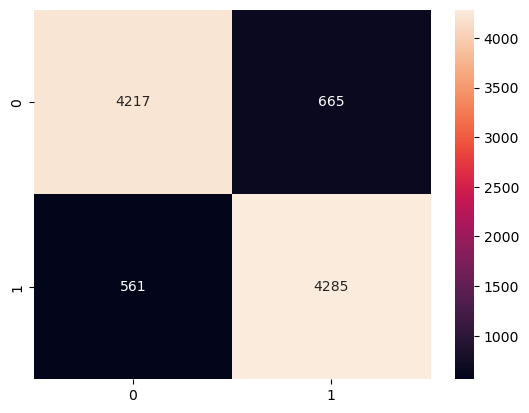

In [157]:
                        #Initialising models
models={'Logistic Regression': LogisticRegression(random_state=42, class_weight="balanced"),
       'Random Forest': RandomForestClassifier(random_state=42, class_weight="balanced"),
       'Gradient Boosting': GradientBoostingClassifier(random_state=42),
       'Ada Boost': AdaBoostClassifier(random_state=42),
       'SVC': SVC(random_state=42, class_weight="balanced"),
       'KNeighbors Classifier': KNeighborsClassifier(),
       'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight="balanced"),
       'XGBoost': XGBClassifier(eval_metric="mlogloss")}
models.items
from sklearn.metrics import accuracy_score
results={}
for model_name,model in models.items():
    print(f"Training {model_name}...")
    model.fit(x_train,y_train)        #training models
    y_pred=model.predict(x_test)      #model prediction on test set
    accuracy=accuracy_score(y_test,y_pred)  #model evaluation
    report=classification_report(y_test,y_pred)
    matrix=confusion_matrix(y_test,y_pred)
    results[model_name]= {'accuracy': accuracy, 'classification report': report, 'confusion matrix': matrix}

    print(f'{model_name} Classification Report')
    print(report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()

In [158]:
# Find the model with the highest accuracy
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = models[best_model_name]

print(f"Best Model: {best_model_name} with accuracy {results[best_model_name]['accuracy']:.2f}")

Best Model: Random Forest with accuracy 0.90


In [159]:
import joblib

# Save the model to a file
joblib.dump(best_model, "best_booking_cancellation_prediction_model.pkl")
print("Model saved as best_booking_cancellation_prediction_model.pkl")

Model saved as best_booking_cancellation_prediction_model.pkl


In [160]:
# Also save scaler and encoder
joblib.dump(scaler, 'scaler.save')
joblib.dump(encoder, 'encoder.save')

['encoder.save']

In [161]:
from sklearn.model_selection import GridSearchCV  #for Hyperparameter tuning

In [162]:
# Defining parameter grid
parameter_grid={'n_estimators':[50,100,150,200,250,300,350,400,450,500],
              'max_depth':[None,10,20,30,40,50,60,70,80,90],
              'min_samples_split':[2,5,10],
              'min_samples_leaf':[1,2,4]}

In [163]:
# Initialising the model
grid_search=GridSearchCV(RandomForestClassifier(random_state=42, class_weight="balanced"),
                        param_grid=parameter_grid,
                        scoring='f1',
                        cv=5,
                        n_jobs=-1)

In [164]:
grid_search.fit(x_train,y_train)  #Training the model

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80,
                                       90],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             scoring='f1')

In [165]:
print(f"Best Hyperparameters: {grid_search.best_params_}")

Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [166]:
best_rf= grid_search.best_estimator_

In [167]:
print(best_rf)

RandomForestClassifier(class_weight='balanced', max_depth=30, n_estimators=500,
                       random_state=42)


In [168]:
y_pred_best_rf=best_rf.predict(x_test)

In [169]:
print('Fine tuned random forest classifier:')
tuned_report= classification_report(y_test,y_pred_best_rf)
print(tuned_report)

Fine tuned random forest classifier:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4882
           1       0.90      0.90      0.90      4846

    accuracy                           0.90      9728
   macro avg       0.90      0.90      0.90      9728
weighted avg       0.90      0.90      0.90      9728



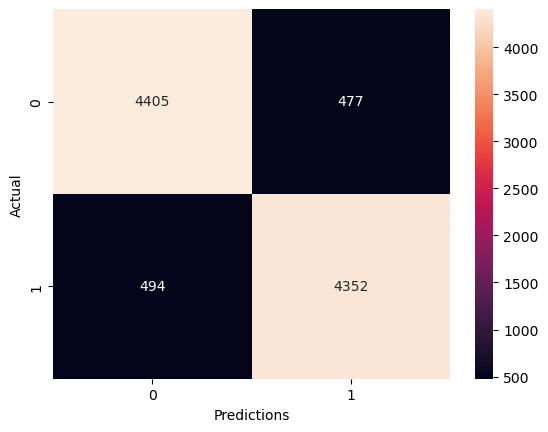

In [170]:
matrix = confusion_matrix(y_test,y_pred_best_rf)
sns.heatmap(matrix, annot=True, fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.show()

In [171]:
from sklearn.metrics import roc_curve, roc_auc_score

In [172]:
y_probs=best_rf.predict_proba(x_test)[:,1]

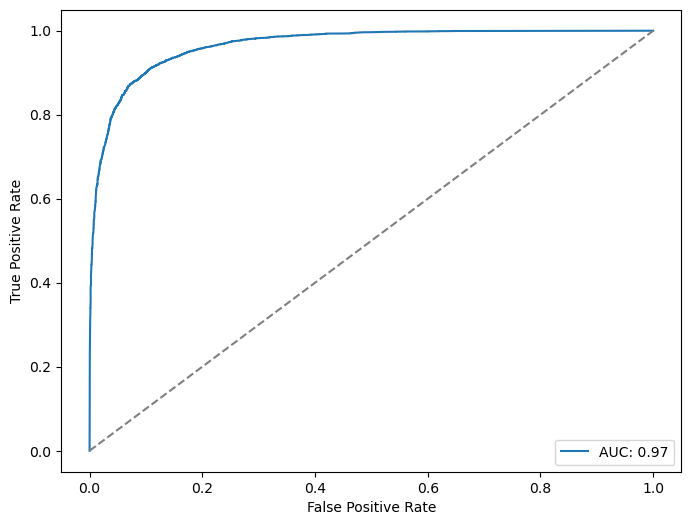

In [173]:
fpr,tpr,threshold = roc_curve(y_test,y_probs)
auc_score = roc_auc_score(y_test,y_probs)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label=f"AUC: {auc_score:.2f}")
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [174]:
#AUC = 0.97 indicates excellent model performance. The curve is very close to the top-left corner, showing:
#High True Positive Rate (TPR); Low False Positive Rate (FPR)
#The model is highly effective at distinguishing between bookings that will be canceled and those that will not.
#Minimal overlap between the two classes, suggesting strong predictive power.
#Demonstrates that the model is a strong predictive tool, suitable for use in improving booking management and reducing cancellations.

In [175]:
from sklearn.decomposition import PCA   #for dimensionality reduction, to see if better performance would be obtained

In [176]:
variances= [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
for var in variances:
    pca=PCA(n_components=var)
    x_train_pca=pca.fit_transform(x_train)
    x_test_pca=pca.transform(x_test)
    models={'Logistic Regression': LogisticRegression(random_state=42, class_weight="balanced"),
       'Random Forest': RandomForestClassifier(random_state=42, class_weight="balanced"),
       'Gradient Boosting': GradientBoostingClassifier(random_state=42),
       'Ada Boost': AdaBoostClassifier(random_state=42),
       'SVC': SVC(random_state=42, class_weight="balanced"),
       'KNeighbors Classifier': KNeighborsClassifier(),
       'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight="balanced"),
       'XGBoost': XGBClassifier(eval_metric="mlogloss")}
    models.items
    results={}
    for model_name,model in models.items():
        print(f"Training {model_name}...")
        model.fit(x_train_pca,y_train)
        y_pred_pca=model.predict(x_test_pca)
        accuracy=accuracy_score(y_test,y_pred_pca)
        report=classification_report(y_test,y_pred_pca)
        results[model_name]= {'accuracy': accuracy, 'classification report': report}
    
        print(f'{model_name} Classification Report')
        print(report)
        print(f"Accuracy with {var*100:.2f}% variance is: {accuracy*100:.2f}")

Training Logistic Regression...
Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.50      0.30      0.37      4882
           1       0.50      0.69      0.58      4846

    accuracy                           0.50      9728
   macro avg       0.50      0.50      0.48      9728
weighted avg       0.50      0.50      0.48      9728

Accuracy with 10.00% variance is: 49.57
Training Random Forest...
Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      4882
           1       0.69      0.69      0.69      4846

    accuracy                           0.69      9728
   macro avg       0.69      0.69      0.69      9728
weighted avg       0.69      0.69      0.69      9728

Accuracy with 10.00% variance is: 69.16
Training Gradient Boosting...
Gradient Boosting Classification Report
              precision    recall  f1-score   support

     

In [177]:
#Insights: PCA application did not produce better performance

In [178]:
data3=data1.copy() #Dataset without any clipping done at all

In [179]:
col_to_encode= ["type of meal","room type","market segment type","booking status"]
encoders={}
for col in col_to_encode:
    data3[col]=encoder.fit_transform(data3[col])
    encoders[col]=encoder

In [180]:
data3[num_cols_to_scale]=scaler.fit_transform(data3[num_cols_to_scale])  #Scaling the dataset

In [181]:
x3=data3.drop("booking status",axis=1)
y3=data3["booking status"]

In [182]:
x_resampled3, y_resampled3 = smote.fit_resample(x3,y3)

In [183]:
resampled_data3=pd.DataFrame(x_resampled3,columns=x3.columns)

In [184]:
resampled_data3["booking status"]=y_resampled3

In [185]:
resampled_data3.to_csv('raw_unclipped_uncleaned_rebalanced_booking_cancellation3.csv', index=False)

In [186]:
x_train3,x_test3,y_train3,y_test3=train_test_split(x_resampled3,y_resampled3,test_size=0.2,random_state=42)  #Data Splitting

Training Logistic Regression...
Logistic Regression Classification Report3
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      4833
           1       0.77      0.77      0.77      4926

    accuracy                           0.76      9759
   macro avg       0.76      0.76      0.76      9759
weighted avg       0.76      0.76      0.76      9759



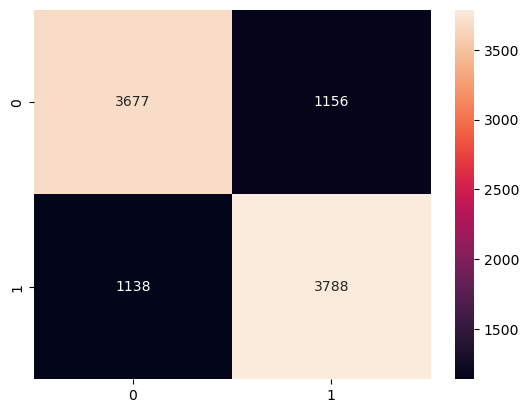

Training Random Forest...
Random Forest Classification Report3
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4833
           1       0.90      0.90      0.90      4926

    accuracy                           0.90      9759
   macro avg       0.90      0.90      0.90      9759
weighted avg       0.90      0.90      0.90      9759



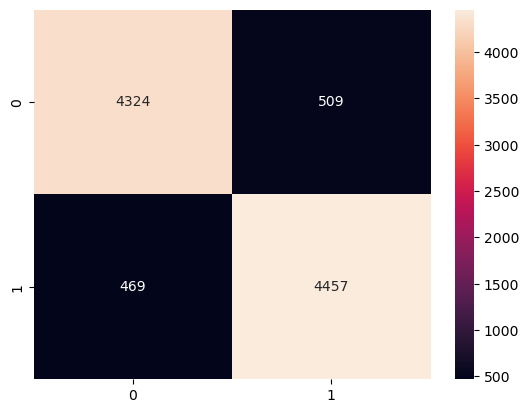

Training Gradient Boosting...
Gradient Boosting Classification Report3
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      4833
           1       0.81      0.84      0.83      4926

    accuracy                           0.82      9759
   macro avg       0.82      0.82      0.82      9759
weighted avg       0.82      0.82      0.82      9759



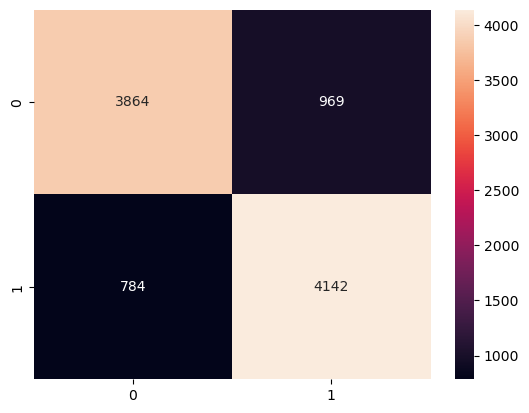

Training Ada Boost...
Ada Boost Classification Report3
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      4833
           1       0.77      0.78      0.77      4926

    accuracy                           0.77      9759
   macro avg       0.77      0.77      0.77      9759
weighted avg       0.77      0.77      0.77      9759



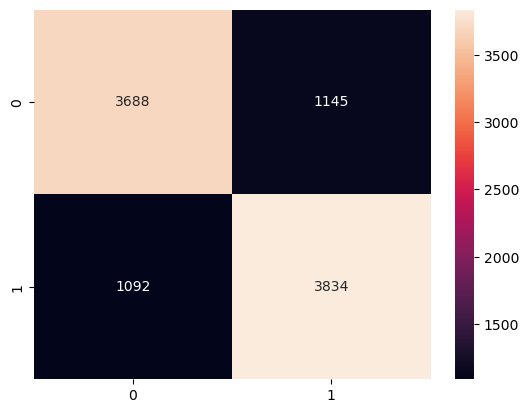

Training SVC...
SVC Classification Report3
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      4833
           1       0.80      0.79      0.79      4926

    accuracy                           0.79      9759
   macro avg       0.79      0.79      0.79      9759
weighted avg       0.79      0.79      0.79      9759



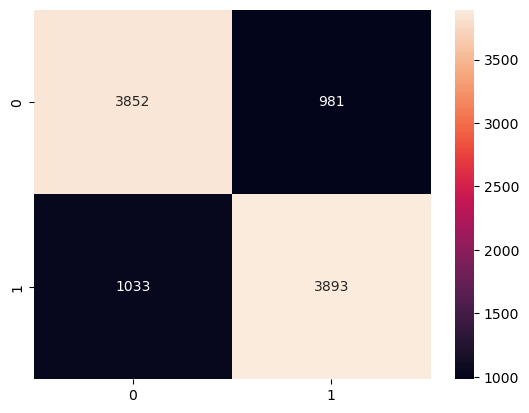

Training KNeighbors Classifier...
KNeighbors Classifier Classification Report3
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      4833
           1       0.88      0.84      0.86      4926

    accuracy                           0.86      9759
   macro avg       0.86      0.86      0.86      9759
weighted avg       0.86      0.86      0.86      9759



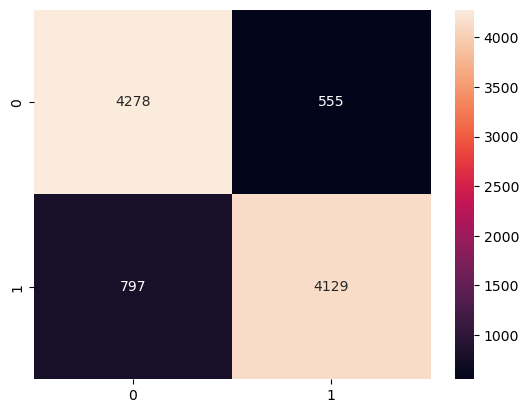

Training Decision Tree...
Decision Tree Classification Report3
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4833
           1       0.87      0.87      0.87      4926

    accuracy                           0.87      9759
   macro avg       0.87      0.87      0.87      9759
weighted avg       0.87      0.87      0.87      9759



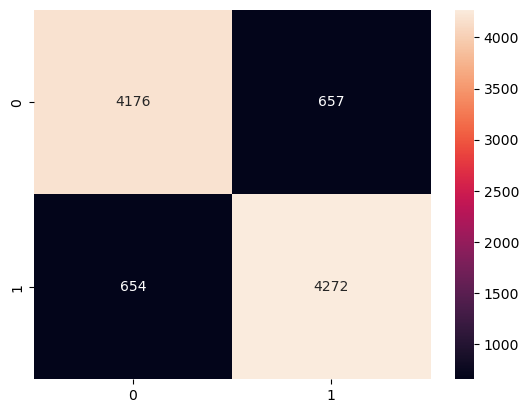

Training XGBoost...
XGBoost Classification Report3
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      4833
           1       0.86      0.89      0.87      4926

    accuracy                           0.87      9759
   macro avg       0.87      0.87      0.87      9759
weighted avg       0.87      0.87      0.87      9759



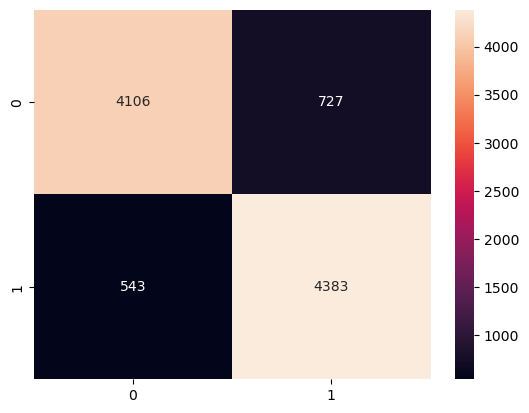

In [187]:
models={'Logistic Regression': LogisticRegression(random_state=42, class_weight="balanced"),
       'Random Forest': RandomForestClassifier(random_state=42, class_weight="balanced"),
       'Gradient Boosting': GradientBoostingClassifier(random_state=42),
       'Ada Boost': AdaBoostClassifier(random_state=42),
       'SVC': SVC(random_state=42, class_weight="balanced"),
       'KNeighbors Classifier': KNeighborsClassifier(),
       'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight="balanced"),
       'XGBoost': XGBClassifier(eval_metric="mlogloss")}
models.items
from sklearn.metrics import accuracy_score
results3={}
for model_name,model in models.items():
    print(f"Training {model_name}...")
    model.fit(x_train3,y_train3)
    y_pred3=model.predict(x_test3)
    accuracy3=accuracy_score(y_test3,y_pred3)
    report3=classification_report(y_test3,y_pred3)
    matrix3=confusion_matrix(y_test3,y_pred3)
    results3[model_name]= {'accuracy3': accuracy3, 'classification report3': report3, 'confusion matrix3': matrix3}

    print(f'{model_name} Classification Report3')
    print(report3)
    sns.heatmap(matrix3, annot=True, fmt='g')
    plt.show()

In [188]:
#Insight: No significant difference in results obtained with and without outliers handled

In [189]:
data2c=data2a.copy()  #to work on the cleaned dataset - recategorizing Meal Plan 3 into an 'Other' bucket

In [190]:
data2c['type of meal'] = data2c['type of meal'].replace({'Meal Plan 3': 'Other'})

In [191]:
data2c['type of meal'].value_counts()

type of meal
Meal Plan 1     27785
Not Selected     5116
Meal Plan 2      3301
Other               5
Name: count, dtype: int64

In [192]:
encoder2c=LabelEncoder()

In [193]:
col_to_encode= ["type of meal","room type","market segment type","booking status"]
encoders2c={}
for col in col_to_encode:
    data2c[col]=encoder.fit_transform(data2c[col])
    encoders2c[col]=encoder2c

In [194]:
data2c[num_cols_to_scale]=scaler.fit_transform(data2c[num_cols_to_scale])  #Scaling the dataset

In [195]:
x2c=data2c.drop("booking status",axis=1)
y2c=data2c["booking status"]

In [196]:
x_resampled2c, y_resampled2c = smote.fit_resample(x2c,y2c)

In [197]:
resampled_data2c=pd.DataFrame(x_resampled2c,columns=x2c.columns)

In [198]:
resampled_data2c["booking status"]=y_resampled2c

In [199]:
resampled_data2c.to_csv('cleaned_rebalanced_mealplan_adjusted_booking_cancellation2c.csv', index=False)

In [200]:
x_train2c,x_test2c,y_train2c,y_test2c=train_test_split(x_resampled2c,y_resampled2c,test_size=0.2,random_state=42)  #Data Splitting

Training Logistic Regression...
Logistic Regression Classification Report2c
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      4882
           1       0.77      0.78      0.78      4846

    accuracy                           0.78      9728
   macro avg       0.78      0.78      0.78      9728
weighted avg       0.78      0.78      0.78      9728



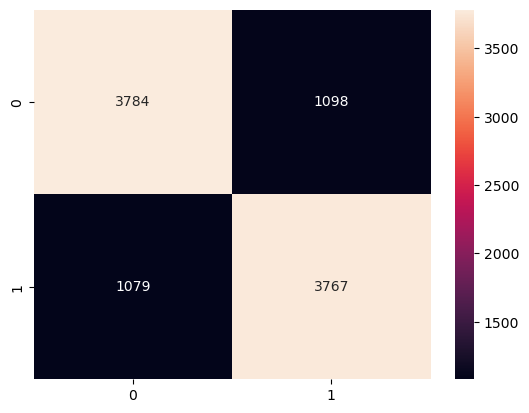

Training Random Forest...
Random Forest Classification Report2c
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4882
           1       0.89      0.90      0.90      4846

    accuracy                           0.90      9728
   macro avg       0.90      0.90      0.90      9728
weighted avg       0.90      0.90      0.90      9728



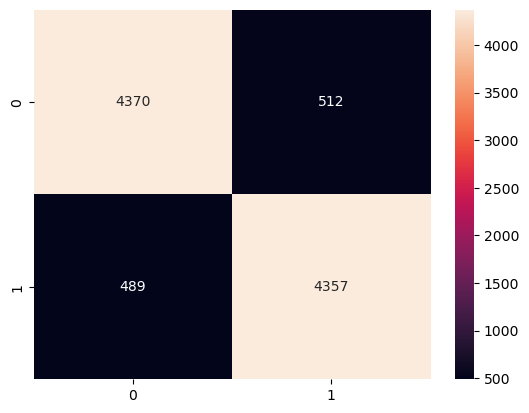

Training Gradient Boosting...
Gradient Boosting Classification Report2c
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      4882
           1       0.81      0.84      0.83      4846

    accuracy                           0.82      9728
   macro avg       0.82      0.82      0.82      9728
weighted avg       0.82      0.82      0.82      9728



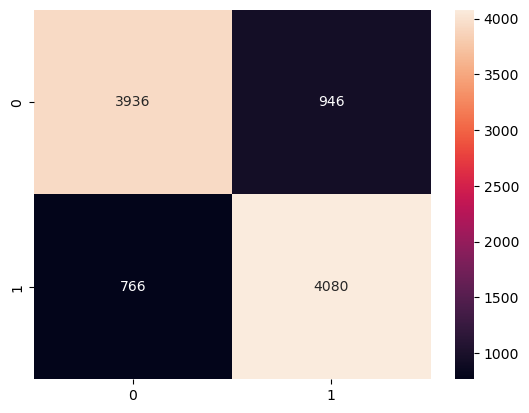

Training Ada Boost...
Ada Boost Classification Report2c
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      4882
           1       0.78      0.78      0.78      4846

    accuracy                           0.78      9728
   macro avg       0.78      0.78      0.78      9728
weighted avg       0.78      0.78      0.78      9728



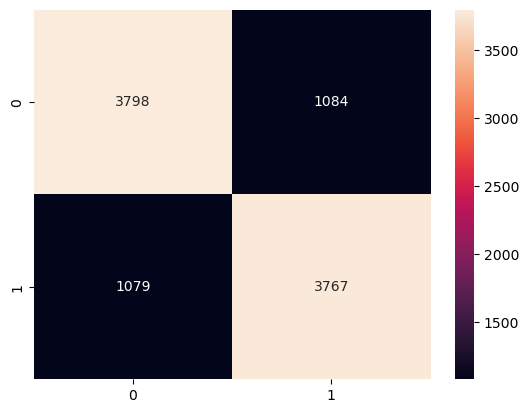

Training SVC...
SVC Classification Report2c
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      4882
           1       0.80      0.81      0.81      4846

    accuracy                           0.81      9728
   macro avg       0.81      0.81      0.81      9728
weighted avg       0.81      0.81      0.81      9728



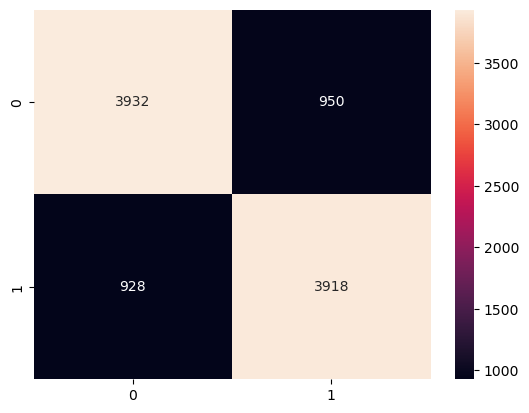

Training KNeighbors Classifier...
KNeighbors Classifier Classification Report2c
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4882
           1       0.89      0.83      0.86      4846

    accuracy                           0.86      9728
   macro avg       0.87      0.86      0.86      9728
weighted avg       0.87      0.86      0.86      9728



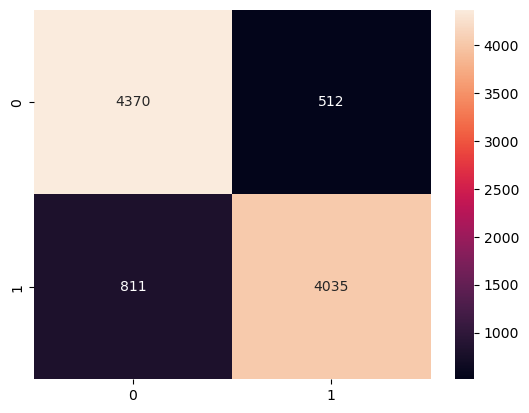

Training Decision Tree...
Decision Tree Classification Report2c
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4882
           1       0.86      0.86      0.86      4846

    accuracy                           0.86      9728
   macro avg       0.86      0.86      0.86      9728
weighted avg       0.86      0.86      0.86      9728



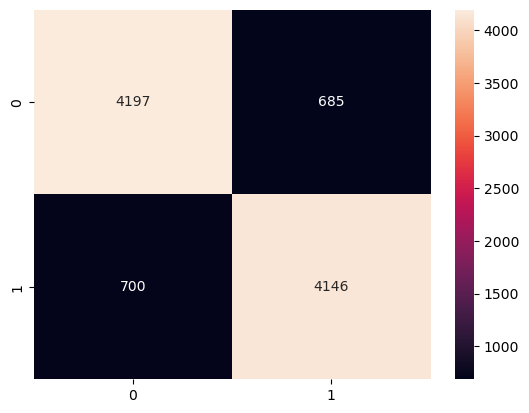

Training XGBoost...
XGBoost Classification Report2c
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      4882
           1       0.86      0.89      0.87      4846

    accuracy                           0.87      9728
   macro avg       0.87      0.87      0.87      9728
weighted avg       0.87      0.87      0.87      9728



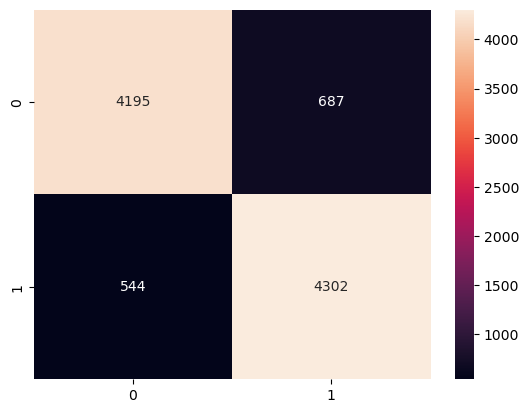

In [201]:
models2c={'Logistic Regression': LogisticRegression(random_state=42, class_weight="balanced"),
       'Random Forest': RandomForestClassifier(random_state=42, class_weight="balanced"),
       'Gradient Boosting': GradientBoostingClassifier(random_state=42),
       'Ada Boost': AdaBoostClassifier(random_state=42),
       'SVC': SVC(random_state=42, class_weight="balanced"),
       'KNeighbors Classifier': KNeighborsClassifier(),
       'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight="balanced"),
       'XGBoost': XGBClassifier(eval_metric="mlogloss")}
models2c.items
from sklearn.metrics import accuracy_score
results2c={}
for model_name,model in models2c.items():
    print(f"Training {model_name}...")
    model.fit(x_train,y_train)
    y_pred2c=model.predict(x_test2c)
    accuracy2c=accuracy_score(y_test2c,y_pred2c)
    report2c=classification_report(y_test2c,y_pred2c)
    matrix2c=confusion_matrix(y_test2c,y_pred2c)
    results2c[model_name]= {'accuracy': accuracy2c, 'classification report': report2c, 'confusion matrix': matrix2c}

    print(f'{model_name} Classification Report2c')
    print(report2c)
    sns.heatmap(matrix2c, annot=True, fmt='g')
    plt.show()

In [202]:
#Conclusion: Random Forest Classifier Model successfully trained with accuracy of 90%.
#No significant difference in model accuracy resulting from minor tweaks in data preprocessing as illustrated above
#See powerpoint presentation for further summarised Insights and Recommendations to the business